# <span style="color:blue">6주차 RDKit 기초</span>

https://www.rdkit.org/docs/GettingStartedInPython.html

In [59]:
#RDkit으로 수많은 분자데이터에서 원하는 정보를 뽑아내는 것을 할 수 있다.

#클래스: 변수, 함수(메서드) 덩어리.
#인스턴스: 어떤 클래스의 객체. (클래스를 복제한 틀)
#모듈: 변수, 함수, 클래스들이 들어있는 파일. 그 것들을 불러와서 사용할 수 있는 파이썬 파일.
#패키지: 도트(.)를 사용하여 모듈을 계층적(디렉터리 구조)으로 관리하게 해줌.

#from 패키지명 import 모듈명

#a = 모듈명.모듈속 클래스()
#print(a.모듈속 클래스속 매서드())

#print(모듈명.모듈속 매서드())

In [37]:
# rdkit의 Molecule class : rdkit.Chem.rdchem.Mol
# rdkit의 Atom class : rdkit.Chem.rdchem.Atom
# rdkit의 Bond class : rdkit.Chem.rdchem.Bond

#교재에 각 class의 method를 진한 글씨로 적어놓음, method((input-type) arg)-> output-type 
#다른 class가 같은 method를 갖고 있을 수 있음. 예시 GetBonds(Mol), GetBonds(Atom)

rdkit.Chem.rdmolfiles
rdkit.Chem.rdchem

## <분자 읽기 및 쓰기>

## 단일 분자 읽기
https://www.rdkit.org/docs/source/rdkit.Chem.rdmolfiles.html

In [30]:
import sys    #sys package는 표준 라이브러리
print(sys.prefix)    #시스템 경로 위치를 확인

C:\Users\Ohyeseul\anaconda3


In [2]:
!conda install --yes prefix (sys.prefix) rdkit -c conda-forge   #rdkit 다운로드 오류.


CondaValueError: invalid package specification: (sys.prefix)



In [3]:
!conda install --yes --prefix C:\Users\Ohyeseul\anaconda3 rdkit -c conda-forge  #rdkit 다운로드.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Ohyeseul\anaconda3

  added / updated specs:
    - rdkit


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38haa244fe_3         3.1 MB  conda-forge
    rdkit-2021.09.2            |   py38h6643f78_0        50.8 MB  conda-forge
    ------------------------------------------------------------
                                           Total:        53.8 MB

The following packages will be UPDATED:

  conda                               4.10.3-py38haa244fe_2 --> 4.10.3-py38haa244fe_3
  rdkit                            2021.03.5-py38h6643f78_0 --> 2021.09.2-py38h6643f78_0




rdkit-2021.09.2      | 50.8 MB   |            |   0% 
rdkit-2021.09.2      | 50.8 MB   |            |   0% 
rdkit-2021.09.2      | 50.8 MB   | 2          |   3% 
rdkit-2021.09.2      | 50.8 MB   |

In [56]:
import rdkit                # rdkit 패키지를 불러온다.
from rdkit import Chem

#rdkit 패키지에서 그 하위의 Chem을 불러옴. 
#rdkit은 패키지, Chem은 rdkit의 sub-모듈. 
#rdkit.Chem으로도 접근 가능. 
#Chem 밑에 있는 함수 불러올 수 있게 됨.

### drugs.smi 파일 / drugs.sdf 파일 가져와서 분자들 정보를 담아둘 때
* drugs.smi 파일 (SMILES로 된 파일)   - 빈 리스트에 SMILES 한줄 씩 읽어서 집어 넣음. (리스트 안에 분자들이 mol 타입으로 들어있음.)

In [ ]:
import rdkit
from rdkit import Chem
#1################################
all_drugs = []                       #빈 리스트 정의. 
with open('drugs.smi','r') as fin:   #읽기 모드로 drug.smi파일을 연다. (파일 객체를 내가 fin이라고 하기로 지정한 것))  /  #( ,"r")을 안쓰면 default 값은 읽기 모드.
    for l in fin:                    #fin(파일)에서 한줄 씩 읽어들임.
        smiles = l.strip()           #문자열.strip()은 앞뒤의 빈칸, \n (new line 줄바꿈), \t 을 지워줌.  /   #smiles 이라는 변수에 SMILES 문자열이 들어감.
        m = Chem.MolFromSmiles(smiles)   #m은 Mol-타입 인스턴스. (smiles 들을 mol type으로 변환시켜서 m에 저장이 됨.)
        all_drugs.append(m)          #리스트명.append()은 ()안의 변수들을 해당 리스트에 집어 넣음.
#2################################
molecules = []                    
with open('drugs.smi') as fp:      
    for line in fp:    
        mol = Chem.MolFromSmiles(line.strip())    
        molecules.append(mol)
#3################################
molecules = []
for smi in open('drugs.smi').readlines():     #drugs.smi 파일에서 한줄 씩 읽게됨.
    m = Chem.MolFromSmiles(smi)
    molecules.append(m)

* drugs.sdf 파일 (mol file format) - supplier에 담음. (supplier 안에 분자들이 mol 타입으로 들어있음.)

In [ ]:
import rdkit
from rdkit import Chem

supplier = Chem.SDMolSupplier('drugs.sdf')  #supplier안에 분자 정보들을 먼저 담음.
##################################
for m in supplier:                          #supplier에 분자 정보가 들어있어 for문으로 분자 하나씩 빼올 수 있음.
##################################
supplier[0]                                 #supplier 안의 분자에 순서도 할당되어 있어 특정 분자 꺼내올 수 있음.

### SMILES에서 분자구조로 바꾸는 함수  m~=Chem.MolFromSmiles('SMILES')

https://www.rdkit.org/docs/source/rdkit.Chem.rdmolfiles.html

* 앞으로 나올 m,m1,...,m~ 등은 Mol 클래스의 개별적인 분자 인스턴스(클래스의 객체)

In [93]:
import rdkit
from rdkit import Chem
m = Chem.MolFromSmiles('Cc1ccccc1') 

#m은 rdkit 패키지의 Chem 모듈속의 Cc1ccccc1분자 클래스의 인스턴스가 됨.
#Mol class는 원자(Atom), Bond 등등의 정보를 포함하고 있음.

#Cc1ccccc1 은 SMILES. (하나의 문자열(string))
#Chem 밑에 있는 .MolFromSmiles('SMILES') 함수는 SMILES로부터 해당 분자를 불러 들임.
#즉, Cc1ccccc1 라는 SMILES 문자열을 분자로 전환.

#(PubChem에 Draw Structure에서 Smiles검색 창에서 Cc1ccccc1 검색하면 분자구조 뜸.)

In [94]:
dir(Chem) #dir이라는 내장 명령어는 어떤 모듈이 어떤 변수, 함수, 클래스를 갖는지 또는 어떤 클래스가 어떤 변수, 함수를 가지고 있는지 보여줌.

['ADJUST_IGNOREALL',
 'ADJUST_IGNORECHAINS',
 'ADJUST_IGNOREDUMMIES',
 'ADJUST_IGNORENONDUMMIES',
 'ADJUST_IGNORENONE',
 'ADJUST_IGNORERINGS',
 'ALLOW_CHARGE_SEPARATION',
 'ALLOW_INCOMPLETE_OCTETS',
 'AROMATICITY_CUSTOM',
 'AROMATICITY_DEFAULT',
 'AROMATICITY_MDL',
 'AROMATICITY_RDKIT',
 'AROMATICITY_SIMPLE',
 'AddHs',
 'AddMetadataToPNGFile',
 'AddMetadataToPNGString',
 'AddMolSubstanceGroup',
 'AddRecursiveQuery',
 'AddWavyBondsForStereoAny',
 'AdjustQueryParameters',
 'AdjustQueryProperties',
 'AdjustQueryWhichFlags',
 'AllChem',
 'AllProps',
 'AromaticityModel',
 'AssignAtomChiralTagsFromMolParity',
 'AssignAtomChiralTagsFromStructure',
 'AssignCIPLabels',
 'AssignChiralTypesFromBondDirs',
 'AssignRadicals',
 'AssignStereochemistry',
 'AssignStereochemistryFrom3D',
 'Atom',
 'AtomFromSmarts',
 'AtomFromSmiles',
 'AtomKekulizeException',
 'AtomMonomerInfo',
 'AtomMonomerType',
 'AtomPDBResidueInfo',
 'AtomProps',
 'AtomSanitizeException',
 'AtomValenceException',
 'Bond',
 'BondDir'

In [5]:
type(m)  

#m이라는 변수의 type은? 
#어쩌구.Mol 이므로 Mol-타입 인스턴스.
#m이라는 인스턴스 안에는 Cc1ccccc1 분자의 정보가 담겨있음.

rdkit.Chem.rdchem.Mol

In [6]:
#Cc1ccccc1 : 올바른 SMILES. 숫자는 ring closure(고리를 닫기) 위해 사용됨. 숫자 1과 1은 암묵적으로 이어주는 역할.
#C1CCCCC2 : 잘못된 SMILES. 만들고 싶었던건 사이클로헥세인인데 숫자 1과 2가 매치되지 않음. 고리를 닫기 위해서는 매치가 되는 정수의 숫자쌍이 있어야 함.

import rdkit
from rdkit import Chem
m = Chem.MolFromSmiles('Cc1ccccc1')   #올바른 SMILES 는 .Mol-type이 되었음.

m2 = Chem.MolFromSmiles('C1CCCCC2')   #잘못된 SMILES 예시.
print(m2)                 #잘못된 SMILES를 주면 m2에 none이 return 됨.

None


In [7]:
# drugs. smi 파일에서 SMILES 들을 읽어서 all_drugs 라는 리스트에 넣기.
# 코딩을 할 때는 어떻게 step by step으로 원하는 일을 수행할 지 생각하는 것이 중요.
# 목표: 파일 open함 -> (text 파일의 한줄이 SMILES 하나이므로) 한줄 씩 읽어서 SMILES를 전부 mol 타입으로 전환해서 -> all_drugs라는 list에 넣기  
import rdkit
from rdkit import Chem

all_drugs = []                       #빈 리스트 정의.
with open('drugs.smi','r') as fin:   #읽기 모드로 drug.smi파일(text파일)(이루리)을 연다. (fin이라는 파일 포인터로(즉, 파일 객체를 내가 fin이라고 하기로 지정한 것))  /  #( ,"r")을 안쓰면 default 값은 읽기 모드.
    for l in fin:                    #한줄 씩 읽어들임.
        smiles = l.strip()           #문자열.strip()은 앞뒤의 빈칸, \n (new line 줄바꿈), \t 을 지워줌.  /   #smile 이라는 변수에 SMILES 문자열이 들어감.
        m = Chem.MolFromSmiles(smiles)   #m은 Mol-타입 인스턴스. (SMILES 문자열이 들어있는 smiles 들을 mol type으로 변환시켜서 m에 저장이 됨.)
        all_drugs.append(m)          #리스트명.append()은 ()안의 변수들을 해당 리스트에 집어 넣음.

In [19]:
print(all_drugs)   #.Mol 로 끝나므로 잘 변환되어 리스트에 들어간 것을 확인할 수 있음.

[<rdkit.Chem.rdchem.Mol object at 0x0000022BD9B0E460>, <rdkit.Chem.rdchem.Mol object at 0x0000022BD9AC9340>, <rdkit.Chem.rdchem.Mol object at 0x0000022BD9B0E100>, <rdkit.Chem.rdchem.Mol object at 0x0000022BD9B0E220>, <rdkit.Chem.rdchem.Mol object at 0x0000022BD9B0E040>, <rdkit.Chem.rdchem.Mol object at 0x0000022BD9B0E2E0>, <rdkit.Chem.rdchem.Mol object at 0x0000022BD9B0E160>, <rdkit.Chem.rdchem.Mol object at 0x0000022BD9B0E1C0>, <rdkit.Chem.rdchem.Mol object at 0x0000022BD9B0E280>, <rdkit.Chem.rdchem.Mol object at 0x0000022BD9B0E3A0>, <rdkit.Chem.rdchem.Mol object at 0x0000022BD9B0E520>, <rdkit.Chem.rdchem.Mol object at 0x0000022BD9B0E4C0>, <rdkit.Chem.rdchem.Mol object at 0x0000022BD9B0E5E0>, <rdkit.Chem.rdchem.Mol object at 0x0000022BD9B0E580>, <rdkit.Chem.rdchem.Mol object at 0x0000022BD9B0E400>, <rdkit.Chem.rdchem.Mol object at 0x0000022BD9B0E640>, <rdkit.Chem.rdchem.Mol object at 0x0000022BD9B0E760>, <rdkit.Chem.rdchem.Mol object at 0x0000022BD9B0E700>, <rdkit.Chem.rdchem.Mol obje

In [20]:
len(all_drugs)     #리스트 길이 600개 (원래 724갠데?). 즉, 리스트 안에 600개의 Mol-타입 분자가 들어가 있음.

600

---
## 분자 세트 읽기 supplier=Chem.SDMolSupplier('  .sdf')
---

In [3]:
#Supplier 기능이 Chem 모듈 안에 있음. Supplier는 제공자.(여러개의 분자들을 한꺼번에 담음)

import rdkit
from rdkit import Chem
supplier = Chem.SDMolSupplier('drugs.sdf')  #drugs.sdf 파일(이루리)에서 여러개의 분자를 읽음.

In [15]:
type(supplier)

#suppl이라는 변수의 type은? 
#어쩌구.SDMolSupplier 인데 (여러개의 molecule들을 한꺼번에 담음). 교재 참고하면 for문을 돌릴 수 있음.

rdkit.Chem.rdmolfiles.SDMolSupplier

In [4]:
print(supplier[0])

In [31]:
import rdkit
from rdkit import Chem
supplier = Chem.SDMolSupplier('drugs.sdf')

for mol in supplier:      #drugs.sdf 파일 안에 sdf 형식으로 표현된 여러개의 분자가 있는데 supplier라는 애로 한번 담은 다음, for 반복문을 통해서 supplier에서 하나씩 끄집어내서 mol이라는 변수에다 치환. 
    print(mol.GetNumAtoms())   #mol은 Mol-타입의 인스턴스(클래스), GetNumAtoms()는 Mol-타입 클래스의 매서드로써 mol의 Atom 개수를 가져와서 return 하라는 함수.

25
11
13
19
36
10
13
16
21
21
25
26
7
30
23
19
20
10
18
19
17
17
20
17
20
13
15
29
16
31
20
19
16
25
16
20
21
24
10
23
26
44
25
21
9
17
24
16
21
19
21
19
26
18
30
12
23
12
11
14
20
32
16
17
23
13
28
19
26
12
35
20
28
39
13
14
20
25
27
21
23
30
19
16
36
13
13
18
28
24
12
32
34
31
20
17
33
18
20
22
33
24
27
199
28
12
25
22
40
10
34
28
22
30
30
22
10
30
26
14
20
21
24
20
22
27
19
41
18
24
28
43
14
32
29
16
19
29
30
10
36
19
34
22
27
34
31
22
37
35
18
16
33
46
13
18
24
22
21
28
26
22
31
39
19
25
19
32
27
22
15
51
15
20
26
12
9
4
34
22
14
34
31
31
17
35
36
45
24
19
25
39
32
27
29
32
26
21
22
17
23
50
17
41
22
32
33
23
12
11
28
23
17
45
32
21
19
28
25
19
33
35
26
15
30
28
10
15
11
19
16
22
54
22
15
9
15
40
21
13
32
20
21
16
26
18
37
26
19
17
35
31
11
28
31
23
22
65
14
22
32
40
19
22
26
23
22
13
10
28
15
36
21
12
17
46
18
14
22
13
21
27
10
24
27
36
23
22
29
23
16
25
31
16
29
23
32
22
18
24
19
14
20
28
35
65
22
23
14
21
17
27
25
29
30
23
41
37
19
15
29
51
18
19
16
39
31
30
20
14
29
51
27
29
22

* "개수" 얻는 법. --->  변수=0 / for문 / 변수+=1

In [21]:
#이번엔 index와 함께 개수를 출력해보자.
import rdkit
from rdkit import Chem
supplier = Chem.SDMolSupplier('drugs.sdf')

idx = 0   #index
for m in supplier: 
    atom_num = m.GetNumAtoms()
    print(f"Mol No. {idx} has {atom_num} atoms.")
    idx += 1

Mol No. 0 has 25 atoms.
Mol No. 1 has 11 atoms.
Mol No. 2 has 13 atoms.
Mol No. 3 has 19 atoms.
Mol No. 4 has 36 atoms.
Mol No. 5 has 10 atoms.
Mol No. 6 has 13 atoms.
Mol No. 7 has 16 atoms.
Mol No. 8 has 21 atoms.
Mol No. 9 has 21 atoms.
Mol No. 10 has 25 atoms.
Mol No. 11 has 26 atoms.
Mol No. 12 has 7 atoms.
Mol No. 13 has 30 atoms.
Mol No. 14 has 23 atoms.
Mol No. 15 has 19 atoms.
Mol No. 16 has 20 atoms.
Mol No. 17 has 10 atoms.
Mol No. 18 has 18 atoms.
Mol No. 19 has 19 atoms.
Mol No. 20 has 17 atoms.
Mol No. 21 has 17 atoms.
Mol No. 22 has 20 atoms.
Mol No. 23 has 17 atoms.
Mol No. 24 has 20 atoms.
Mol No. 25 has 13 atoms.
Mol No. 26 has 15 atoms.
Mol No. 27 has 29 atoms.
Mol No. 28 has 16 atoms.
Mol No. 29 has 31 atoms.
Mol No. 30 has 20 atoms.
Mol No. 31 has 19 atoms.
Mol No. 32 has 16 atoms.
Mol No. 33 has 25 atoms.
Mol No. 34 has 16 atoms.
Mol No. 35 has 20 atoms.
Mol No. 36 has 21 atoms.
Mol No. 37 has 24 atoms.
Mol No. 38 has 10 atoms.
Mol No. 39 has 23 atoms.
Mol No. 40 

---
### 예제1)  drugs.sdf 파일안의 평균 원자 개수를 all_drug 리스트를 이용해 구하기. 
---

In [23]:
#앞에서 drugs. smi 파일에서 SMILES 들을 읽어서 all_drugs 라는 리스트에 넣었음.
#힌트: total_atom_num(전체 원자 개수) / 분자 개수
import rdkit
from rdkit import Chem
supplier = Chem.SDMolSupplier('drugs.sdf')

total_atom_num = 0
counter = 0
for m in supplier:
    atom_num = m.GetNumAtoms()                     #두줄을 추려서 써도됨. 
    total_atom_num = total_atom_num + atom_num     #total_atom_num += m.GetNumAtoms()
    counter = counter + 1                          #분자 개수 counter.
average_atom_num = total_atom_num / counter
print(f"Average Number of atoms in drugs.sdf is {average_atom_num}!")
    

Average Number of atoms in drugs.sdf is 24.041379310344826!


# <span style="color:blue">8주차 RDKit 기초 2</span>

### (복습) 단일 분자 읽기 / 분자 세트 읽기

In [3]:
import rdkit                         #rdkit 불러오기.
from rdkit import Chem               #Chem은 rdkit의 sub-모듈 (rdkit내에서 가장 많이 사용되는 것만 모아놓은 sub 모듈)
supplier=Chem.SDMolSupplier("drugs.sdf")

In [2]:
len(supplier)    #supplier안에 분자가 몇개 있는지? (len은 여러개를 담고있는 자료형에서 먹힘)

725

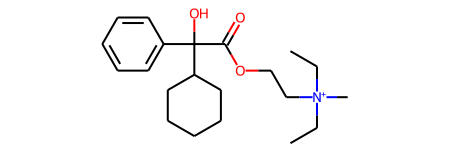

In [5]:
import rdkit
from rdkit import Chem
supplier = Chem.SDMolSupplier('drugs.sdf')

supplier[0]

In [11]:
import rdkit
from rdkit import Chem
supplier = Chem.SDMolSupplier('drugs.sdf')

for mol in supplier:     #mol은 분자 정보가 들어가 있는 mol 인스턴스(class).(mol class 안에는 여러가지 기능을 수행하는 메서드들이 들어있음.)
    print(mol.GetNumAtoms())    #GetNumAtoms는 rdkit의 Mol-타입 class의 메서드. 

25
11
13
19
36
10
13
16
21
21
25
26
7
30
23
19
20
10
18
19
17
17
20
17
20
13
15
29
16
31
20
19
16
25
16
20
21
24
10
23
26
44
25
21
9
17
24
16
21
19
21
19
26
18
30
12
23
12
11
14
20
32
16
17
23
13
28
19
26
12
35
20
28
39
13
14
20
25
27
21
23
30
19
16
36
13
13
18
28
24
12
32
34
31
20
17
33
18
20
22
33
24
27
199
28
12
25
22
40
10
34
28
22
30
30
22
10
30
26
14
20
21
24
20
22
27
19
41
18
24
28
43
14
32
29
16
19
29
30
10
36
19
34
22
27
34
31
22
37
35
18
16
33
46
13
18
24
22
21
28
26
22
31
39
19
25
19
32
27
22
15
51
15
20
26
12
9
4
34
22
14
34
31
31
17
35
36
45
24
19
25
39
32
27
29
32
26
21
22
17
23
50
17
41
22
32
33
23
12
11
28
23
17
45
32
21
19
28
25
19
33
35
26
15
30
28
10
15
11
19
16
22
54
22
15
9
15
40
21
13
32
20
21
16
26
18
37
26
19
17
35
31
11
28
31
23
22
65
14
22
32
40
19
22
26
23
22
13
10
28
15
36
21
12
17
46
18
14
22
13
21
27
10
24
27
36
23
22
29
23
16
25
31
16
29
23
32
22
18
24
19
14
20
28
35
65
22
23
14
21
17
27
25
29
30
23
41
37
19
15
29
51
18
19
16
39
31
30
20
14
29
51
27
29
22

### 여러가지 rdkit mol 클래스 메서드 찾는법
https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html

구글에서 rdkit mol class method를 검색  
-> 가장 맨위 링크 클릭  
-> ctrl+f로 **The molecule class** 찾음  
-> 밑에 진한 글씨들이 mol class 안의 메서드(함수)들  
예1) Compute2DCoords : 2차원으로 구조 그릴 수 있도록 죄표를 생성해주는 메서드  
예2) ComputeGasteigerCharges : 부분전하 계산  
예3) GetAromaticAtoms : 이 분자안에서 aromatic으로 인식되는 atom들을 return 해줌

---
## 분자 세트 읽기 supplier=Chem.SDMolSupplier('  .sdf')
---

In [12]:
#-> 메서드 옆에 ()는 입력할 수 있는 옵션인데 []는 입력 안해도 되는 옵션들
# ARGUMENTS: 는 어떤 것을 input으로 받는 지
# RETURN: 은 메서드를 돌렸을 때 리턴하는 값 / 리턴값을 주기도 하지만, 클래스 자체에 변형을 주는 메서드도 있음.

---
### 예제2) 원자의 개수가 30이상인 큰 분자들만 large_molecules 리스트에 저장.
---

In [27]:
import rdkit                         
from rdkit import Chem              
supplier=Chem.SDMolSupplier('drugs.sdf')

large_molecules = []
for mol in supplier:
    atom_num = mol.GetNumAtoms()
    if atom_num >= 30:
        large_molecules.append(mol)
        
print(f"원자개수가 30이상인 큰분자 개수:{len(large_molecules)}, 맨 마지막 분자:{large_molecules[-1]}")

원자개수가 30이상인 큰분자 개수:181, 맨 마지막 분자:<rdkit.Chem.rdchem.Mol object at 0x0000019A43F64820>


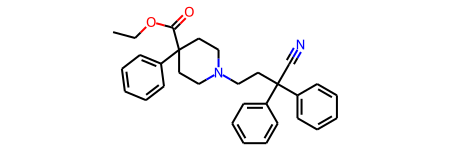

In [19]:
large_molecules[-1]

---
### 예제2/응용) 리스트 내포
---

In [28]:
import rdkit                         
from rdkit import Chem              
supplier=Chem.SDMolSupplier('drugs.sdf')

large_molecules2 = [mol for mol in supplier if mol.GetNumAtoms() >= 30]
#위에서 리스트를 만드는 5줄의 과정을 1줄로 -> 리스트 내포 (점프투 파이선) / 리스트 컴프리헨션 (제대로 파이썬)

print(f"원자개수가 30이상인 큰분자 개수:{len(large_molecules)}, 맨 마지막 분자:{large_molecules[-1]}")

원자개수가 30이상인 큰분자 개수:181, 맨 마지막 분자:<rdkit.Chem.rdchem.Mol object at 0x0000019A43F64820>


---
## 분자 쓰기
---

### 1) 분자를 SMILES로 출력하는 함수 print(Chem.MolToSmiles(m~)) 

In [32]:
# large_molecules2 제일 마지막에 있는 분자의 SMILES 표현식을 출력시켜보자!
import rdkit                         
from rdkit import Chem 

print(Chem.MolToSmiles(large_molecules[-1]))

CCOC(=O)C1(c2ccccc2)CCN(CCC(C#N)(c2ccccc2)c2ccccc2)CC1


In [76]:
#(복습) SMILES에서 분자로 바꿔서 분자 구조 보기. 
import rdkit                         
from rdkit import Chem 

m1=Chem.MolFromSmiles('C[C@H](O)c1ccccc1')   #@는 반시계방향, @@는 시계방향. 

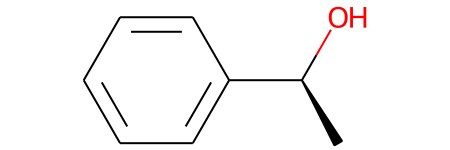

In [43]:
m1

In [45]:
import rdkit                         
from rdkit import Chem 

m2=Chem.MolFromSmiles('C[CH](O)c1ccccc1')   #chirality는 필수는 아님.

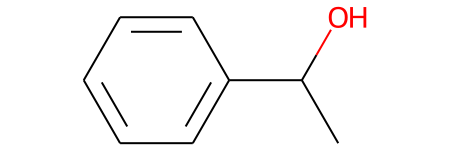

In [46]:
m2

In [47]:
import rdkit                         
from rdkit import Chem 

Chem.MolToSmiles(m1)

'C[C@H](O)c1ccccc1'

### 옵션 주기 Chem.메서드명(m~, 옵션)

In [49]:
# .MolToSmile() 라는 메서드에 어떤 옵션이 있는지는 구글링 하면 됨.
# 구글에 rdkit chem moltosmiles를 검색
#-> 가장 맨위 링크 클릭 
#-> ctrl+f로 MolToSmiles 찾음 
#-> ARGUMENTS: 에 (optional)들 나열.

In [48]:
import rdkit                         
from rdkit import Chem 
m1=Chem.MolFromSmiles('C[C@H](O)c1ccccc1')

Chem.MolToSmiles(m1, isomericSmiles=False) #isomericSmiles는 chirality를 빼고 출력하는 옵션

'CC(O)c1ccccc1'

In [50]:
import rdkit                         
from rdkit import Chem 
m1=Chem.MolFromSmiles('C[C@H](O)c1ccccc1')

Chem.MolToSmiles(m1, kekuleSmiles=True) #kekuleSmiles는 aromatic bond가 single,double(=),...로 출력하는 옵션

'C[C@H](O)C1=CC=CC=C1'

### 2)분자를 Mol-포맷(2D 좌표)로 출력하는 함수 print(Chem.MolToMolBlock(m~))
###### constance(좌표)

In [54]:
import rdkit                         
from rdkit import Chem 
m1=Chem.MolFromSmiles('C[C@H](O)c1ccccc1')

print(Chem.MolToMolBlock(m1))


     RDKit          2D

  9  9  0  0  0  0  0  0  0  0999 V2000
    3.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500    1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  2  1  1  1
  2  3  1  0
  2  4  1  0
  4  5  2  0
  5  6  1  0
  6  7  2  0
  7  8  1  0
  8  9  2  0
  9  4  1  0
M  END



### m~ .SetProp("_Name","분자이름") <--- m~ 분자의 속성 설정 함수(분자 이름 넣기)  

In [60]:
#Set Prop = set property. property (성질).
import rdkit                         
from rdkit import Chem 
m1=Chem.MolFromSmiles('C[C@H](O)c1ccccc1')

m1.SetProp("_Name","(S)-1-Phenylethanol")   #m1이라는 인스턴스(클래스) 안에 Name이라는 변수를 만들고 그 이름을 (S)-1-Phenylethanol라고 하겠다.

In [64]:
print(Chem.MolToMolBlock(m1))

(S)-1-Phenylethanol
     RDKit          2D

  9  9  0  0  0  0  0  0  0  0999 V2000
    3.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.7500    1.2990    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  2  1  1  1
  2  3  1  0
  2  4  1  0
  4  5  2  0
  5  6  1  0
  6  7  2  0
  7  8  1  0
  8  9  2  0
  9  4  1  0
M  END



In [62]:
dir(m1)   #dir이라는 내장 명령어는 어떤 class가 어떤 변수, 함수를 가지고 있는지 보여줌. (내가 만들어 넣은건 안보여주나봄)

['AddConformer',
 'ClearComputedProps',
 'ClearProp',
 'Debug',
 'GetAromaticAtoms',
 'GetAtomWithIdx',
 'GetAtoms',
 'GetAtomsMatchingQuery',
 'GetBondBetweenAtoms',
 'GetBondWithIdx',
 'GetBonds',
 'GetBoolProp',
 'GetConformer',
 'GetConformers',
 'GetDoubleProp',
 'GetIntProp',
 'GetNumAtoms',
 'GetNumBonds',
 'GetNumConformers',
 'GetNumHeavyAtoms',
 'GetProp',
 'GetPropNames',
 'GetPropsAsDict',
 'GetRingInfo',
 'GetStereoGroups',
 'GetSubstructMatch',
 'GetSubstructMatches',
 'GetUnsignedProp',
 'HasProp',
 'HasSubstructMatch',
 'NeedsUpdatePropertyCache',
 'RemoveAllConformers',
 'RemoveConformer',
 'SetBoolProp',
 'SetDoubleProp',
 'SetIntProp',
 'SetProp',
 'SetUnsignedProp',
 'ToBinary',
 'UpdatePropertyCache',
 '__DebugMol',
 '__GetSubstructMatch',
 '__GetSubstructMatches',
 '__class__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getinitargs__',
 '__gt__',
 '__hash__',
 '__

### 수소를 붙이는 함수 new m~ =Chem.AddHs(m~)

In [ ]:
#새로운 분자 instance를 리턴한다는 점에 주의!
#어떤 함수는 새로운 분자를 리턴하지 않고 어떤 함수는 리턴하므로 교재 reference 참고.
#구글에 rdkit chem addhs 검색.
#-> 첫번째 링크 클릭.
#-> RETURNS: a new molcule with added Hs  (H가 붙어있는 새로운 분자를 return 함)
#-> NOTES: The original molecule is not modified. (주의할 점은 원래있는 분자는 바뀌지 않고 새로운 것을 return함)

In [66]:
import rdkit                         
from rdkit import Chem 
m1=Chem.MolFromSmiles('C[C@H](O)c1ccccc1')

m1_with_H = Chem.AddHs(m1)    #원래 있던 것이 수정되는게 아니라 새로운 것이 생성되므로 새로운 인스턴스 이름으로 받아줘야함.이제 m1_with_H는 새로운 분자 인스턴스(클래스).

In [67]:
print(Chem.MolToMolBlock(m1_with_H))

(S)-1-Phenylethanol
     RDKit          2D

 19 19  0  0  0  0  0  0  0  0999 V2000
    4.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000   -1.5000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
    1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500   -1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.7500    1.2990    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    6.0000    0.0000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    4.6828   -1.4888    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    4.5000    1.5000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    3.0000    1.5000    0.0000 H   0  0  0  0  0  0  0  0  0  0  0  0
    4.

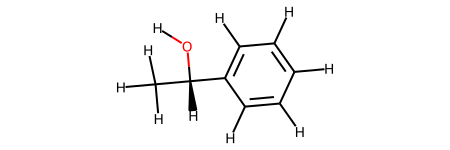

In [68]:
import rdkit                         
from rdkit import Chem 
m1=Chem.MolFromSmiles('C[C@H](O)c1ccccc1')
m1_with_H = Chem.AddHs(m1)

m1_with_H

In [70]:
import rdkit                         
from rdkit import Chem              
supplier=Chem.SDMolSupplier('drugs.sdf')

large_molecules = []
for mol in supplier:
    atom_num = mol.GetNumAtoms()
    if atom_num >= 30:
        large_molecules.append(mol)
        
m2 = large_molecules[2]

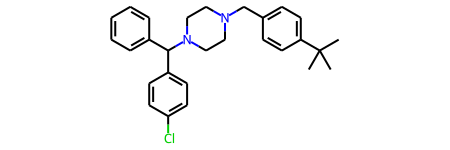

In [71]:
m2

In [73]:
import rdkit                         
from rdkit import Chem              
supplier=Chem.SDMolSupplier('drugs.sdf')

large_molecules = []
for mol in supplier:
    atom_num = mol.GetNumAtoms()
    if atom_num >= 30:
        large_molecules.append(mol)        
m2 = large_molecules[2]

m2_with_H = Chem.AddHs(m2)

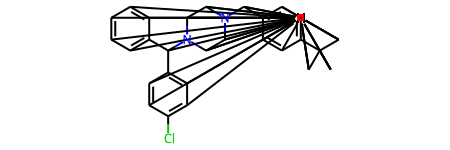

In [74]:
m2_with_H

In [77]:
import rdkit                         
from rdkit import Chem              
supplier=Chem.SDMolSupplier('drugs.sdf')

large_molecules = []
for mol in supplier:
    atom_num = mol.GetNumAtoms()
    if atom_num >= 30:
        large_molecules.append(mol)        
m2 = large_molecules[2]
m2_with_H = Chem.AddHs(m2)

print(Chem.MolToMolBlock(m2_with_H))     #이상하므로 Mol-Format으로 확인해보자!

#문제점 발견! 수소의 좌표가 다 0이다. 수정하자!


     RDKit          2D

 64 67  0  0  1  0  0  0  0  0999 V2000
    1.7321   -1.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.8660   -1.5000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.3660   -2.3660    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.3660   -2.3660    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8660   -1.5000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7321   -1.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7321   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5981    0.5000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.4641    0.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -3.4641   -1.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.3301   -1.5000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.1962   -1.0000    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -6.0622   -1.5000    0

### 2D 좌표 생성 함수(2D 구조 생성 함수) AllChem.Compute2DCoords(m~)
###### rdkit패키지 밑의 Chem모듈 밑의 AllChem모듈 안에 .Compute2dCoords( )함수 있음. (Chem중 자주 사용안되는 것을 AllChem에 넣어 놓음)
* 리턴값은 0이지만 (계산 됐다는 뜻) 분자 자체의 2D 좌표가 변환된다.

In [79]:
import rdkit                         
from rdkit import Chem              
supplier=Chem.SDMolSupplier('drugs.sdf')

large_molecules = []
for mol in supplier:
    atom_num = mol.GetNumAtoms()
    if atom_num >= 30:
        large_molecules.append(mol)        
m2 = large_molecules[2]
m2_with_H = Chem.AddHs(m2)

from rdkit.Chem import AllChem          #rdkit.Chem에서 AllChem 불러옴.
AllChem.Compute2DCoords(m2_with_H)

0

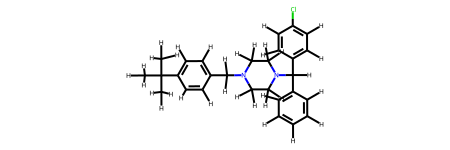

In [81]:
m2_with_H

In [82]:
#수소가 잘 붙음. Mol-Format으로 확인해보면 수소 좌표가 생김.
print(Chem.MolToMolBlock(m2_with_H))


     RDKit          2D

 64 67  0  0  1  0  0  0  0  0999 V2000
   -8.6220   -0.0338    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -7.1220   -0.0297    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -7.1260    1.4703    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -7.1180   -1.5297    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.6220   -0.0257    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.8685   -1.3227    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.3685   -1.3187    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.6220   -0.0177    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.1220   -0.0136    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.3780   -0.0096    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.1315   -1.3066    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.6315   -1.3026    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.3780   -0.0016    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    4.8780    0.0024    0

### 3D 좌표 생성 함수(3차원 구조 생성 함수) AllChem.EmbedMolecule(m~) -10주차-
<span style="color:red">### mol.GetAtoms() vs AllChem.EmbedMolecule(mol) 차이 = 사용방식의 차이이다!</span>

<span style="color:red">### mol(클래스)의 내장함수: GetAtoms() </span>

<span style="color:red">### mol(클래스)의 내장함수에 Embed~() 함수 없음. AllChem.Embed()에 mol을 입력하여 사용</span>

In [83]:
#분자의 3차원 구조를 얻는 것은 어렵다...!
#rotatable bond 하나당 (trans 1, gaouche 2)총 3개의 구조 
#즉, 3의 n제곱 개의 3D 구조가 가능 (n = # rotatble bonds)
#그 중에서 에너지가 가장 낮은 것을 찾는 것은 쉽지 않다.
#그래서 rdkit에서는 약간의 가정과 근사를 써서 3D 구조를 만들어낸다.

In [ ]:
import rdkit                         
from rdkit import Chem              
supplier=Chem.SDMolSupplier('drugs.sdf')

large_molecules = []
for mol in supplier:
    atom_num = mol.GetNumAtoms()
    if atom_num >= 30:
        large_molecules.append(mol)        
m2 = large_molecules[2]
m2_with_H = Chem.AddHs(m2)

from rdkit.Chem import AllChem          #rdkit.Chem에서 AllChem 불러옴.
AllChem.Compute2DCoords(m2_with_H)

In [84]:
AllChem.EmbedMolecule(m2_with_H)  #분자 클래스(인스턴스) 자체를 변형. 

0

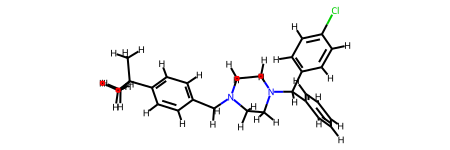

In [86]:
m2_with_H      # m2_with_H인스턴스가 2에서 3차원으로 변형.

In [85]:
print(Chem.MolToMolBlock(m2_with_H))   #3D 좌표가 생성된 것을 확인 할 수 있다.


     RDKit          3D

 64 67  0  0  1  0  0  0  0  0999 V2000
   -7.5068   -0.1848   -0.9567 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.7603    0.3927    0.2136 C   0  0  0  0  0  0  0  0  0  0  0  0
   -7.3478   -0.1566    1.5385 C   0  0  0  0  0  0  0  0  0  0  0  0
   -6.8901    1.8852    0.3031 C   0  0  0  0  0  0  0  0  0  0  0  0
   -5.3302   -0.0190    0.1418 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.9596   -1.0853   -0.6365 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.6565   -1.4923   -0.6974 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.7041   -0.7953    0.0559 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3400   -1.3521   -0.0341 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2749   -0.6318    0.5178 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.7865   -1.5150    0.9522 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8599   -1.6037   -0.1261 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.3141   -0.2875   -0.5018 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.6759   -0.2795   -0

### 수소를 떼는 함수 new m~ =Chem.RemoveHs(m~)

In [87]:
import rdkit                         
from rdkit import Chem              
supplier=Chem.SDMolSupplier('drugs.sdf')

large_molecules = []
for mol in supplier:
    atom_num = mol.GetNumAtoms()
    if atom_num >= 30:
        large_molecules.append(mol)        
m2 = large_molecules[2]                #m2
m2_with_H = Chem.AddHs(m2)             #m2_with_H : H있음

from rdkit.Chem import AllChem             #rdkit.Chem에서 AllChem 불러옴.
AllChem.Compute2DCoords(m2_with_H)     #m2_with_H : H있음 + 2차원
AllChem.EmbedMolecule(m2_with_H)       #m2_with_H : H있음 + 3차원
m2_without_H=Chem.RemoveHs(m2_with_H)  #m2_without_H : H없음 + 3차원 

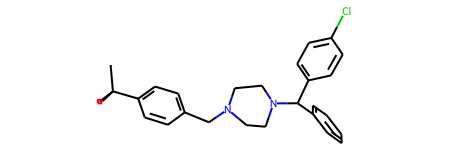

In [88]:
m2_without_H

In [90]:
import rdkit                         
from rdkit import Chem              
supplier=Chem.SDMolSupplier('drugs.sdf')

large_molecules = []
for mol in supplier:
    atom_num = mol.GetNumAtoms()
    if atom_num >= 30:
        large_molecules.append(mol)        
m2 = large_molecules[2]                #m2
m2_with_H = Chem.AddHs(m2)             #m2_with_H : H있음

from rdkit.Chem import AllChem             #rdkit.Chem에서 AllChem 불러옴.
AllChem.Compute2DCoords(m2_with_H)     #m2_with_H : H있음 + 2차원
AllChem.EmbedMolecule(m2_with_H)       #m2_with_H : H있음 + 3차원
m2_without_H=Chem.RemoveHs(m2_with_H)  #m2_without_H : H없음 + 3차원 

#다시 2D로 바꿔보면..
AllChem.Compute2DCoords(m2_without_H)  #m2_without_H : H없음 + 2차원 

0

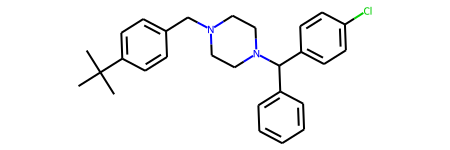

In [92]:
m2_without_H                       #그림 파일이므로 우클릭 copy cells 해서 그림판 ppt에 붙일 수 있음.

# <span style="color:blue">9주차(1) RDkit 기초 3 </span>

## <분자 작업> 

##  rdkit.Chem.rdchem (Atom/Mol/Bond/BondType/...)
https://www.rdkit.org/docs/source/rdkit.Chem.rdchem.html  
검색 **The molecule class**
---
##  m~ a~ b~.메서드 () 
m~ : Mol 클래스인스턴스/
a~ : Atom 클래스인스턴스/
b~ : Bond/BondType 클래스인스턴스

* 교재에서 rdkit의 Atom class : rdkit.Chem.rdchem.Atom 밑에 진한 글씨로 사용가능한 메서드들이 나옴. 
----

--- 
##  for ~ in ~  (원자와 결합에 대한 반복 Loop)
---

### m~ .GetAtoms()   <---  m~ 분자의 Atom을 얻는 함수 
* (리턴:ROAtomSeq) 모든 Atom이 들어있는 순서가 있는 집합을 얻게됨. 따라서 특정 번째 [숫자] 사용 가능.

In [1]:
import rdkit
from rdkit import Chem     
m = Chem.MolFromSmiles('C1OC1')
for atom in m.GetAtoms():      # .GetAtoms() 메서드로 m~분자 안의 원자를 얻은 후 for문으로 하나씩 돌려줌. 즉, 원자 하나 하나 Loop를 돌고 그것을 atom이라는 변수에 집어 넣음.
    print(atom.GetAtomicNum())   # .GetAtomicNum() 메서드로 atom 원자번호를 리턴. 

6
8
6


In [34]:
type(m.GetAtoms())

rdkit.Chem.rdchem._ROAtomSeq

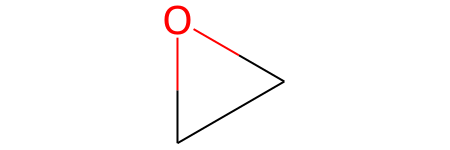

In [2]:
import rdkit
from rdkit import Chem     
m = Chem.MolFromSmiles('C1OC1')
m

In [12]:
type(m)

rdkit.Chem.rdchem.Mol

### m~ 또는 a~ .GetBonds() <--- m~ 분자 또는 a~ 원자의 Bond를 얻는 함수
* (리턴:ROBondSeq) 모든 Bond가 들어있는 순서가 있는 집합을 얻게됨. 따라서 특정 번째 [숫자] 사용 가능.

In [15]:
import rdkit
from rdkit import Chem     
m = Chem.MolFromSmiles('C1OC1')

#공유 결합을 하나씩 살펴보자.
for bond in m.GetBonds():       # m~.GetBonds()는 분자의 모든 공유결합들의 순서 집합을 얻게됨. 
    print(bond)

In [17]:
type(m.GetBonds())

rdkit.Chem.rdchem._ROBondSeq

In [18]:
m.GetBonds()[0]

In [19]:
m.GetBonds()[0].GetBondType()

rdkit.Chem.rdchem.BondType.SINGLE

In [28]:
def function(smile,n):
    m = Chem.MolFromSmiles(smile) 
    return m.GetBonds()[n].GetBondType()
function('C1OC1',0)

rdkit.Chem.rdchem.BondType.SINGLE

### b~ .GetBondType() <---  b~ 결합 유형을 얻는 함수 
* (리턴:BondType) 사용시에 str()으로 감싸줘야함

In [6]:
import rdkit
from rdkit import Chem     
m = Chem.MolFromSmiles('C1OC1')

for bond in m.GetBonds():
    print(bond.GetBondType())   # b~.GetBondType()은 bond-type 출력. 문자열(string)같지만 다른 개념.

SINGLE
SINGLE
SINGLE


In [10]:
import rdkit
from rdkit import Chem     
m = Chem.MolFromSmiles('C1OC1')

print(m.GetBonds()[0].GetBondType())

SINGLE


In [52]:
type(bond.GetBondType())   

rdkit.Chem.rdchem.BondType

### m~ .GetAtomWithIdx(숫자)  <---  m~ 분자의 (숫자-1)번째 Atom을 얻는 함수 
* (리턴:Atom)

In [9]:
import rdkit
from rdkit import Chem     
m = Chem.MolFromSmiles('C1OC1')

atom1 = m.GetAtomWithIdx(0)   # m~.GetAtomWithIdx()은 m이라는 분자(Mol-type instance)에서 첫번째(0) atom을 얻음.

In [10]:
type(atom1)

rdkit.Chem.rdchem.Atom

### a~ .GetSymbol()  <---  a~ 원자의 원소기소를 얻는 함수 
* (리턴:문자열(str)) 

In [13]:
import rdkit
from rdkit import Chem     
m = Chem.MolFromSmiles('C1OC1')
atom1 = m.GetAtomWithIdx(0)

atom1.GetSymbol()    # a~.GetSymbol()는 a~ 원자의 원자기호를 얻는 함수

'C'

In [14]:
import rdkit
from rdkit import Chem     
m = Chem.MolFromSmiles('C1OC1')
atom1 = m.GetAtomWithIdx(0)  #m.GetAtomWithIdx(0)(m 분자의 첫번째 원자)를 얻어서 해당 원자를 atom1이라는 변수에 집어넣은 후, 
atom1.GetSymbol()  #atom1.메서드()로 작업(atom1이라는 Atom 인스턴스의 메서드 사용)해도 되지만,

import rdkit
from rdkit import Chem     
m = Chem.MolFromSmiles('C1OC1')
m.GetAtomWithIdx(0).GetSymbol() #그냥 m.GetAtomWithIdx(0).다른메서드() 이렇게 바로 바로 이어서 작업해도 됨.
#단계적으로 보면 m은 Mol 인스턴스, m.GetAtomWithIdx(0)은 Atom 인스턴스, m.GetAtomWithIdx(0).GetSymbol()은 str(문자열)이 됨.

'C'

In [23]:
import rdkit
from rdkit import Chem     
m = Chem.MolFromSmiles('C1OC1')
m.GetAtomWithIdx(0).GetSymbol()

type(m.GetAtomWithIdx(0).GetSymbol())

str

### a~ .GetExplicitValence() <---  a~ 원자의 비공유 전자쌍이 몇개인지 얻는 함수.
* (리턴:정수(int))
* 수소를 안붙여주면 수소가 결합하는 자리 하나당 비공유전자쌍 한개.

In [27]:
import rdkit
from rdkit import Chem     
m = Chem.MolFromSmiles('C1OC1')

m.GetAtomWithIdx(0).GetExplicitValence()   #그 원자의 비공유 전자쌍이 몇개인지 리턴. (수소를 안붙여주면 수소 결합자리 하나당 비공유전자쌍 한개)

2

In [28]:
type(m.GetAtomWithIdx(0).GetExplicitValence())

int

### b~ .GetBeginAtomIdx()   &   b~ .GetEndAtomIdx() 
### <---  b~ 결합의 시작 원자 & 끝 원자를 얻는 함수.
* (리턴:정수(int))

In [29]:
import rdkit
from rdkit import Chem     
m = Chem.MolFromSmiles('C1OC1')

# 첫번째 결합(0)은 몇번 원자들 사이에 있을 까?-> 0번과 1번 원자 사이에 결합이 이루어짐.
m.GetBondWithIdx(0).GetBeginAtomIdx()  #해당 bond의 시작하는 원자의 index 리턴.

0

In [17]:
import rdkit
from rdkit import Chem     
m = Chem.MolFromSmiles('C1OC1')

m.GetBondWithIdx(0).GetEndAtomIdx()  #해당 bond의 끝나는 원자의 index 리턴.

1

In [21]:
import rdkit
from rdkit import Chem     
m = Chem.MolFromSmiles('C1OC1')

# 두번째 결합(1)은 몇번 원자들 사이에 있을 까?-> 1번과 2번 원자 사이에 결합이 이루어짐.
m.GetBondWithIdx(1).GetBeginAtomIdx()

1

In [22]:
import rdkit
from rdkit import Chem     
m = Chem.MolFromSmiles('C1OC1')

m.GetBondWithIdx(1).GetEndAtomIdx() 

2

### m~ .GetBondBetweenAtoms( , )  <---  m~ 분자의 ( , )원자 사이 Bond의 Bond Type을 얻는 함수.
* (리턴:BondType)  사용시에 str()으로 감싸줘야함

In [26]:
import rdkit
from rdkit import Chem     
m = Chem.MolFromSmiles('C1OC1')

m.GetBondBetweenAtoms(0,1).GetBondType()  # m분자에서 0번,1번 원자 사이의 bond를 얻고, 그 bond의 bond-type을 리턴해라.

rdkit.Chem.rdchem.BondType.SINGLE

### a~ .GetNeighbors() <---  a~ 원자의 이웃한 원자들의 리스트를 얻는 함수.
* (리턴:tuple)  리스트와 비슷하지만 바꿀 수 없는 자료형.

In [ ]:
import rdkit
from rdkit import Chem     
m = Chem.MolFromSmiles('C1OC1')

#분자의 특정 원자를 얻어서 -> 그 원자의 이웃 원자 리스트를 얻어서 -> 그 원자들의 원자기호 얻기
atom1 = m.GetAtomWithIdx(0)
neighbors_list = atom1.GetNeighbors()  #특정 원자(atom1)의 neighbors (이웃한 원자들의 리스트)를 리턴.
print(neighbors_list)

In [30]:
type(neighbors_list)     #튜플은 리스트와 비슷한데 바꿀 수 없는 자료형.

tuple

In [31]:
import rdkit
from rdkit import Chem     
m = Chem.MolFromSmiles('C1OC1')
atom1 = m.GetAtomWithIdx(0)
neighbors_list = atom1.GetNeighbors()

for neighbors_atom in neighbors_list:
    print(neighbors_atom.GetSymbol())

O
C


* 리스트내포

In [33]:
import rdkit
from rdkit import Chem     
m = Chem.MolFromSmiles('C1OC1')

#리스트 내포로 한번에 얻기.
[neighbors_atom.GetSymbol() for neighbors_atom in m.GetAtomWithIdx(0).GetNeighbors()]

['O', 'C']

---
### 예제3) 특정 분자 안에 Br이 존재하는 지 않는지를 판별하는 함수를 짜보자!
---

In [112]:
def has_br(m):                # input은 molecule (Mol-type), output: True/False (존재하는지 않하는지 여부)
    flag = False               # default는 False. (Br이 없다고 생각하자.) Br이 있으면 flag가 True가 됨.
    for atom in m.GetAtoms():  # m 분자에서 원자들을 얻어 atom 변수에 넣은후
        s = atom.GetSymbol()   # atom의 원소 기호를 s 변수에 저장한다.
        if s == "Br":          # s(원소기호)가 Br 이면
            return True        # True
        else:                  # 아니면
            continue           # 다음 걸로 넘어감.
    return flag

---
### 예제3) 특정 분자의 몇번째 결합이 어떤 결합인지 리턴하는 함수를 짜보자!
---

In [32]:
import rdkit
from rdkit import Chem
                                                   # .smi 파일 분자들을 담고 싶을 떄는 Chem.MolFromSmiles(line.strip()) 로 리스트에 담아두기. (예제4/다른풀이 참고)
def what_bond(molecule,n):                         # .sdf 파일 분자들을 담고 싶을 때는 Chem.SDMolSupplier('drugs.sdf')
    supplier = Chem.SDMolSupplier('drugs.sdf')   ##### 주의 : 이 식이 함수 밖에 있으면 안됨 !
    m = supplier[molecule]
    return print(m.GetBonds()[n].GetBondType())
    
what_bond(0,0)      #0번째 분자의 0번째 결합?

SINGLE


---
### 예제4) 특정 분자에 이중결합이 몇개 있는지 count하는 함수를 짜보자! 
* 리스트 생성 후 그안에 DOUBLE이 몇개있는지 세기
---

In [32]:
import rdkit
from rdkit import Chem

molecules = []                    # 먼저 SMILES가 들어있는 .smi파일안 분자 정보를 molcules 리스트에 담아두기.
with open('drugs.smi') as fp:      
    for line in fp:    
        mol = Chem.MolFromSmiles(line.strip())    
        molecules.append(mol)

one_m_bond_list=[]
def count_double(m):
    for b in m.GetBonds():        #GetBonds((Mol)arg1) → _ROBondSeq (리턴되는 타입 유의, 순서이므로 for문)
        c=str(b.GetBondType())     #c=b.GetBondType()     #GetBondType((Bond)arg1) → BondType (str아님)    
                                   #d=str(c)
        one_m_bond_list.append(c)
    return one_m_bond_list.count("DOUBLE")
    
count_double(molecules[0])

2

---
### 예제4/다른풀이) 특정 분자에 이중결합이 몇개 있는지 count하는 함수를 짜보자!
* 변수를 만들어서 DOUBLE 개수가 증가할 때마다 변수가 1씩 더해지는 방식을 사용
---

In [35]:
import rdkit
from rdkit import Chem

molecules = []                    # 먼저 SMILES가 들어있는 .smi파일안 분자 정보를 molcules 리스트에 담아두기.
with open('drugs.smi') as fp:      
    for line in fp:    
        mol = Chem.MolFromSmiles(line.strip())    
        molecules.append(mol)

def has_double(m):
    double = 0
    for bond2 in m.GetBonds():
        if bond2.GetBondType() == rdkit.Chem.BondType.DOUBLE:   #if str(bond2.GetBondType()) == "DOUBLE":
            double += 1
        else:
            continue
    return double

has_double(molecules[0])         # molcules리스트의 0번째 분자는 molcules[0]

2

---
### 예제5) drug.sdf 파일 분자들의 이중결합 개수의 평균을 구하는 함수를 짜보자. 
### input 분자들의 이중결합 개수 리스트 (bond2) , output 평균
---

In [129]:
import rdkit                         
from rdkit import Chem              
supplier=Chem.SDMolSupplier('drugs.sdf')

all_bond2=[]                    #분자들의 이중결합을 각각 담을 리스트 생성.
for m in supplier:              #파일안의 분자들을 한번 담고 for로 분자 한개씩 돌림.
    one_m_bond_list=[]          #분자 한개의 결합들을 담을 리스트 생성.
    for b in m.GetBonds():       #분자 한개의 결함들을 얻는데 리턴되는게 순서타입이므로 for문으로 하나씩 꺼내줌.
        c=str(b.GetBondType())   #분자 하나에서 하나씩 꺼낸 결합의 유형을 얻어주고 
                                 #d=str(c)   문자로 바꿔줌. 
        one_m_bond_list.append(c)   #하나씩 꺼내고 변환한 것을 아까 생성한 리스트에 넣어줌 -> 분자 한개의 결합들을 담은 리스트가 됨.
    all_bond2.append(one_m_bond_list.count("DOUBLE"))     #분자 하나에 해당하는 one_m_bond_list에서 DOUBLE 세서, 분자 전체의 이중결합을 담을 all_bond2리스트에 넣어줌.
print(all_bond2)

[1, 0, 2, 0, 2, 1, 3, 3, 1, 0, 4, 1, 1, 3, 0, 1, 3, 2, 1, 2, 1, 2, 3, 3, 1, 0, 3, 4, 2, 0, 0, 0, 1, 2, 2, 0, 1, 0, 0, 0, 1, 6, 1, 3, 1, 1, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 0, 2, 1, 1, 1, 3, 1, 2, 2, 2, 1, 2, 0, 2, 1, 0, 0, 1, 2, 1, 6, 0, 2, 1, 2, 2, 1, 0, 2, 0, 0, 4, 0, 2, 47, 5, 0, 3, 2, 3, 1, 1, 1, 1, 2, 3, 3, 1, 3, 2, 1, 0, 1, 2, 0, 2, 1, 3, 2, 1, 0, 1, 2, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 0, 3, 4, 3, 2, 0, 1, 3, 3, 3, 3, 3, 2, 3, 4, 0, 1, 0, 3, 2, 2, 0, 0, 0, 3, 1, 0, 1, 1, 0, 1, 0, 2, 2, 1, 5, 1, 1, 2, 1, 1, 1, 3, 3, 2, 1, 2, 2, 3, 3, 2, 3, 1, 2, 1, 4, 0, 4, 3, 2, 1, 0, 2, 2, 0, 1, 0, 2, 2, 1, 3, 3, 1, 2, 1, 1, 1, 0, 3, 0, 2, 0, 1, 0, 1, 1, 1, 1, 1, 4, 1, 1, 2, 0, 4, 0, 1, 3, 2, 3, 4, 1, 0, 1, 2, 1, 0, 0, 4, 1, 1, 3, 1, 0, 4, 3, 1, 3, 2, 1, 1, 3, 1, 2, 0, 1, 3, 2, 0, 2, 0, 1, 4, 1, 1, 2, 0, 1, 0, 0, 0, 1, 1, 2, 1, 4, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 1, 0, 3, 0, 1, 5, 4, 0, 2, 2, 1, 2, 1, 5, 0, 1, 2, 2, 4, 1, 1, 3, 2, 2, 1, 1, 3, 1, 5, 2, 1, 1, 4, 0,

In [130]:
def average(input_bond2):
    avg = sum(input_bond2) / len(input_bond2)
    return avg
average(all_bond2)

1.6262068965517242

---
## 링 정보
---


In [63]:
import rdkit
from rdkit import Chem    

m = Chem.MolFromSmiles('OC1C2C1CC2')

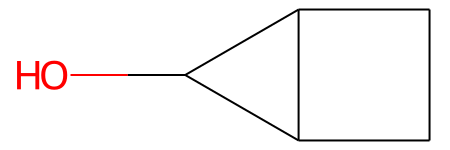

In [64]:
m

In [66]:
import rdkit
from rdkit import Chem    
m = Chem.MolFromSmiles('OC1C2C1CC2')

for atom in m.GetAtoms():
    print(atom.GetSymbol())

O
C
C
C
C
C


In [68]:
import rdkit
from rdkit import Chem    
m = Chem.MolFromSmiles('OC1C2C1CC2')

print(Chem.MolToMolBlock(m))              # .sdf 파일로 저장될 때 저장되는 형태.


     RDKit          2D

  6  7  0  0  0  0  0  0  0  0999 V2000
   -2.5095   -2.5095    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.4489   -1.4489    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  5  1  0
  5  6  1  0
  4  2  1  0
  6  3  1  0
M  END



### m.GetAtomWithIdx(0).IsInRing() <---  m 분자의 첫번째 원자가 ring 안에 존재?

In [65]:
import rdkit
from rdkit import Chem    
m = Chem.MolFromSmiles('OC1C2C1CC2')

m.GetAtomWithIdx(0).IsInRing()         # m 분자의 첫번째 원자가 ring 안에 존재하는가?

False

In [69]:
import rdkit
from rdkit import Chem    
m = Chem.MolFromSmiles('OC1C2C1CC2')

m.GetAtomWithIdx(1).IsInRing()         # m 분자의 두번째 원자가 ring 안에 존재하는가?

True

### m.GetAtomWithIdx(1).IsInRingSize(3) <-- 분자의 두번째 원자 size 3인 ring에 존재?

In [70]:
import rdkit
from rdkit import Chem    
m = Chem.MolFromSmiles('OC1C2C1CC2')

m.GetAtomWithIdx(1).IsInRingSize(3)    # m 분자의 두번째 원자가 size가 3인 ring 안에 존재하는가?

True

--- 
## 2D 분자 작업: 묘사 생성
---

In [76]:
import rdkit
from rdkit import Chem 

m3=Chem.MolFromSmiles("C1=NC(=NN1C2C(C(C(O2)CO)O)O)C(=O)N")

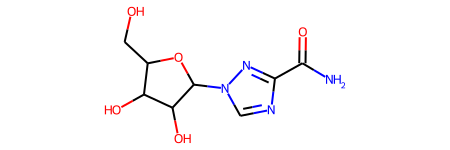

In [77]:
m3

In [78]:
import rdkit
from rdkit import Chem 
m3=Chem.MolFromSmiles("C1=NC(=NN1C2C(C(C(O2)CO)O)O)C(=O)N")

from rdkit.Chem import AllChem    #먼저 AllChem submodule을 불러옴.
AllChem.Compute2DCoords(m3)     #Compute2DCoords라는 함수는 AllChem 안에 들어있기 때문에.

0

In [79]:
import rdkit
from rdkit import Chem 
m3=Chem.MolFromSmiles("C1=NC(=NN1C2C(C(C(O2)CO)O)O)C(=O)N")

from rdkit.Chem import AllChem    #먼저 AllChem submodule을 불러옴.
AllChem.Compute2DCoords(m3)

print(Chem.MolToMolBlock(m3))   #원자간의 겹침을 최대한 방지하도록 그림 생성.


     RDKit          2D

 17 18  0  0  0  0  0  0  0  0999 V2000
    1.4203   -1.7631    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.8919   -1.4724    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.0702    0.0170    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7088    0.6468    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.6891   -0.4534    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.8003   -0.2751    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.8199   -1.3752    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.1813   -0.7454    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0030    0.7439    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5315    1.0346    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -4.1032    1.7636    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.7702    3.2262    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -4.4910   -1.4766    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -1.5292   -2.8468    0

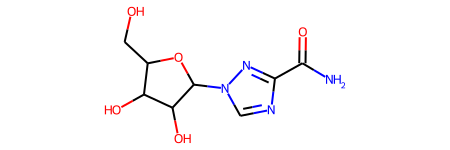

In [81]:
m3

In [82]:
import rdkit
from rdkit import Chem 
m3=Chem.MolFromSmiles("C1=NC(=NN1C2C(C(C(O2)CO)O)O)C(=O)N")

from rdkit.Chem import AllChem   
AllChem.Compute2DCoords(m3)

m3_with_H = Chem.AddHs(m3)

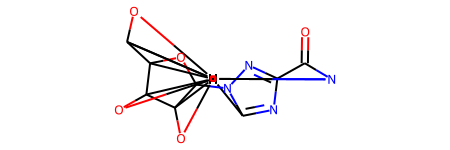

In [83]:
m3_with_H

In [85]:
import rdkit
from rdkit import Chem 
m3=Chem.MolFromSmiles("C1=NC(=NN1C2C(C(C(O2)CO)O)O)C(=O)N")

from rdkit.Chem import AllChem   
AllChem.Compute2DCoords(m3)

m3_with_H = Chem.AddHs(m3)

AllChem.Compute2DCoords(m3_with_H)

0

In [86]:
print(Chem.MolToMolBlock(m3_with_H))


     RDKit          2D

 29 30  0  0  0  0  0  0  0  0999 V2000
    2.2928   -1.8351    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.6454   -1.1866    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    3.4466    0.3002    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.9712    0.5705    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
    1.2581   -0.7491    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2287   -0.9479    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6416   -1.4515    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5572   -0.2633    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.7101    0.9746    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.2710    0.5515    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.0297    1.6876    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.3494    2.4007    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -3.6432   -1.2981    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0
   -0.9931   -2.8041    0

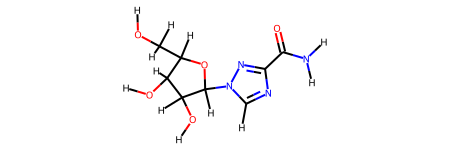

In [87]:
m3_with_H

--- 
## 3D 분자 작업 -> 10주차
---

---
## 분자 그리기 (그림파일로 저장)
---

In [88]:
import rdkit
from rdkit import Chem  

from rdkit.Chem import Draw     #Draw라는 서브모듈이 필요함!

### m~ 분자를 .png.pdf.svg.ps 파일로 저장 Draw.MolToFile(m~,'파일이름.png')
###### ps는 post-script

In [89]:
import rdkit
from rdkit import Chem  

from rdkit.Chem import Draw
Draw.MolToFile(m3_with_H,'m3_with_H.png')

In [92]:
import rdkit
from rdkit import Chem  

from rdkit.Chem import Draw
Draw.MolToFile(m3,'m3.png')

### 분자를 한번에 격자형 이미지로 그리는 법 
### img=Draw.MolsToGridImage(분자리스트,molsPerRow=가로,subImgSize=(,))
### img.save("파일명.png")

In [34]:
from rdkit.Chem import Draw

with Chem.SDMolSupplier('drugs.sdf') as supplier:
    molecule_ok=[x for x in supplier if x is not None]

img=Draw.MolsToGridImage(molecule_ok[:8],molsPerRow=4,subImgSize=(200,200))   #img가 내부적으로 이미지를 가지게 됨.

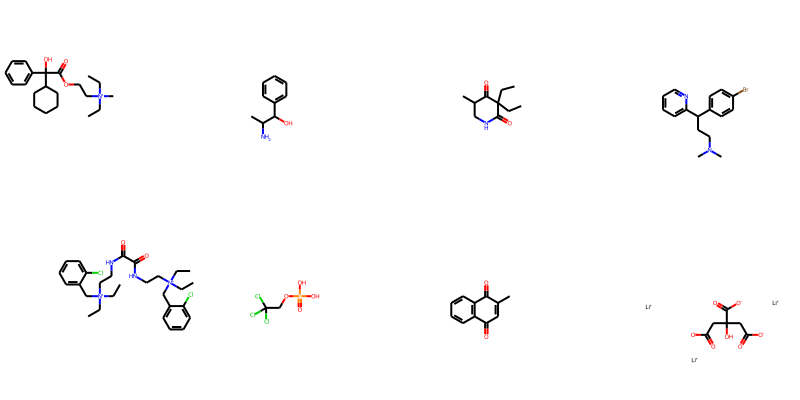

In [35]:
img

# <span style="color:blue">9주차(2) RDKit - Practice</span>

---
### 예제6) durgs.smi 파일을 읽어서 
### 분자들이 가지고 있는 탄소 개수의 히스토그램을 얻어라.
* 히스토그램
 0 ~ 5: xx 개 / 6 ~ 10: yy 개 / 11 ~ 15: 개/ 16 ~ 20: 개/ 21 ~ 25: 개/ 26 ~ 30: 개/ 30 이상: 개
---

In [7]:
#기본적으로 rdkit과 Chem 불러들여놓고
import rdkit
from rdkit import Chem

#먼저 drugs.smi 파일을 읽어서 분자로 변환할 것임.
molecules = []                    # molecule들을 읽어들여 와서 빈 list에 넣을 것임.
with open('drugs.smi') as fp:    # fp(file-pointer) fp는 파일 객체. (점프투 파이썬 '04-3파일 읽고 쓰기' 참고)
    for line in fp:    #fp에서 한줄 씩 읽어들임.
        print(line)    

BrC1=CC2=C(NC(=O)CN=C2C2=CC=CC=N2)C=C1

C#CCN[C@@H]1CCC2=CC=CC=C12

C1(CC[C@@]2([C@@H](CC(N)=O)[C@@]3([C@@]4([N+]5=C([C@H]([C@@]4(CC(N)=O)C)CCC(N)=O)C(C)=C4[N+]6=C(C=C7[N+]8=C([C@H](C7(C)C)CCC(N)=O)C(C)=C2N3[Co-3]568([N+]2=CN([C@H]3O[C@@H]([C@@H](OP(O[C@@H](CN1)C)([O-])=O)[C@H]3O)CO)C1=CC(C)=C(C=C21)C)C)[C@H]([C@@]4(CC(N)=O)C)CCC(N)=O)C)[H])C)=O

C1C2CNCC1C1=C2C=C2N=CC=NC2=C1

C1CN2C[C@@H](N=C2S1)C1=CC=CC=C1

C1CNCCN1

C1N2CN3CN1CN(C2)C3

CC#CC(=O)N1CCC[C@H]1C1=NC(=C2N1C=CN=C2N)C1=CC=C(C=C1)C(=O)NC1=CC=CC=N1

CC#CCN1C(=NC2=C1C(=O)N(CC1=NC3=C(C=CC=C3)C(C)=N1)C(=O)N2C)N1CCC[C@@H](N)C1

CC(=O)C1=C(C)C2=CN=C(NC3=NC=C(C=C3)N3CCNCC3)N=C2N(C2CCCC2)C1=O

CC(=O)C1=CC=C(C=C1)S(=O)(=O)NC(=O)NC1CCCCC1

CC(=O)CC(C1=CC=C(C=C1)[N+]([O-])=O)C1=C(O)C2=CC=CC=C2OC1=O

CC(=O)CC(C1=CC=CC=C1)C1=C(O)C2=C(OC1=O)C=CC=C2

CC(=O)N(C1=C(C)C(C)=NO1)S(=O)(=O)C1=CC=C(N)C=C1

CC(=O)N(CC(O)CO)C1=C(I)C(C(=O)NCC(O)CO)=C(I)C(C(=O)NCC(O)CO)=C1I

CC(=O)N1CCN(CC1)C1=CC=C(OCC2COC(CN3C=CN=C3)(O2)C2=CC=C(Cl)C=C2Cl)C=C1

CC(=O)

In [15]:
#출력된 것을 보면 SMILES 사이 한줄씩 \n 이 생김. newline character를 없애주기 위해 l.strip()을 사용할 것.
molecules = []       
with open('drugs.smi') as fp:      
    for line in fp:    
        mol = Chem.MolFromSmiles(line.strip())    #한줄씩 읽은 smiles를 Mol-type(분자)로 변환시킴.
        molecules.append(mol)                     #하나씩 변환시킨 Mol-type 분자들을 molecules 리스트에 넣음.
print("Number of molecules:",len(molecules))      
#molecules리스트 안에 Mol-type 요소들이 저장되어있다!

for m in molecules:     #여기서부터 molecules리스트 안의 Mol-type(분자)들 마다 탄소수를 얻을 것임.
    num_carbon = 0      #탄소 갯수 세기 위해 변수 지정. num_carbon은 분자들 마다 새로 정의 돼야 함. 
    for atom in m.GetAtoms():        # 리스트 안의 Mol-type(분자)들의 하나당 원자들을 얻어서 각각을 atom 변수에 넣고
        if atom.GetSymbol() == "C":   # atom의 원자기호를 리턴 헌 것이 "C" 라면
            num_carbon += 1          #"C"를 찾을 때마다 num_carbon이 초기값 0에서 1씩 증가.
    #탄소의 개수가 num_carbon안에 들어있음.    

Number of molecules: 600


In [17]:
#그런데 문제는 이렇게 하면 우리가 관심있는 m이라는 molecule의 탄소갯수만 저장되어있음.
#히스토그램을 그리기 위해서는 num_carbon을 보관하는 리스트가 필요. 
#num_carbon_list를 정의해서 리스트에 넣어주면 탄소갯수를 카운트한 m들을 리스트에다 넣어줌. 
num_carbon_list=[]
for m in molecules:     
    num_carbon = 0     
    for atom in m.GetAtoms():    
        if atom.GetSymbol() == "C":  
            num_carbon += 1 
    #탄소의 개수가 num_carbon안에 들어있음. 
    num_carbon_list.append(num_carbon)

    print(num_carbon_list)


600
[14, 12, 63, 13, 11, 4, 6, 26, 25, 24, 15, 19, 19, 13, 19, 26, 11, 8, 4, 5, 16, 2, 5, 20, 22, 12, 9, 14, 15, 17, 16, 15, 15, 14, 17, 14, 32, 20, 14, 24, 32, 23, 36, 13, 12, 12, 17, 13, 18, 19, 9, 26, 10, 19, 17, 19, 31, 11, 16, 33, 16, 10, 22, 40, 29, 17, 13, 29, 31, 29, 31, 27, 27, 25, 25, 16, 25, 8, 14, 21, 26, 22, 26, 24, 19, 27, 11, 16, 22, 11, 12, 14, 18, 18, 16, 14, 15, 20, 21, 22, 23, 28, 28, 28, 10, 14, 13, 37, 19, 23, 17, 19, 19, 20, 18, 17, 18, 7, 11, 11, 12, 9, 11, 13, 18, 2, 3, 8, 7, 11, 5, 45, 12, 12, 16, 15, 17, 15, 12, 20, 23, 23, 21, 12, 14, 22, 8, 24, 16, 16, 19, 20, 15, 16, 20, 12, 12, 26, 25, 30, 26, 10, 12, 15, 22, 24, 14, 19, 14, 17, 15, 14, 18, 26, 12, 28, 10, 10, 10, 22, 27, 22, 6, 21, 22, 18, 25, 17, 17, 18, 11, 8, 17, 16, 19, 18, 16, 10, 13, 21, 16, 15, 30, 22, 10, 35, 11, 22, 7, 13, 12, 12, 7, 13, 11, 12, 21, 12, 24, 16, 29, 17, 29, 30, 19, 8, 25, 18, 12, 9, 11, 12, 8, 19, 7, 24, 23, 33, 22, 24, 22, 20, 25, 22, 25, 23, 19, 19, 21, 12, 24, 12, 23, 19, 30, 2

---
### 예제6/해설ㅇ) durgs.smi 파일을 읽어서 
### 분자들이 가지고 있는 탄소 개수의 히스토그램을 얻어라.
* 히스토그램
 0 ~ 5: xx 개 / 6 ~ 10: yy 개 / 11 ~ 15: 개/ 16 ~ 20: 개/ 21 ~ 25: 개/ 26 ~ 30: 개/ 30 이상: 개
 ---

In [52]:
#기본적으로 rdkit과 Chem 불러들여놓고
import rdkit
from rdkit import Chem


                                  #먼저 drugs.smi 파일을 읽어서 분자로 변환할 것임.
molecules = []                    # molecule들을 읽어들여 와서 빈 list에 넣을 것임.
with open('drugs.smi') as fp:    # fp(file-pointer) fp는 파일 객체. (점프투 파이썬 '04-3파일 읽고 쓰기' 참고)
    for line in fp:            #fp에서 한줄 씩 읽어들임.        
        mol = Chem.MolFromSmiles(line.strip())    #한줄씩 읽은 smiles를 Mol-type(분자)로 변환시킴.
        molecules.append(mol)                     #하나씩 변환시킨 Mol-type 분자들을 molecules 리스트에 넣음.
#molecules리스트 안에 Mol-type 요소들이 저장되어있다!


for m in molecules:     #여기서부터 molecules리스트 안의 Mol-type(분자)들 마다 탄소수를 얻을 것임.
    num_carbon = 0      #탄소 갯수 세기 위해 변수 지정. num_carbon은 분자들 마다 새로 정의 돼야 함. 
    for atom in m.GetAtoms():        # 리스트 안의 Mol-type(분자)들의 하나당 원자들을 얻어서 각각을 atom 변수에 넣고
        if atom.GetSymbol() == "C":  # atom의 원자기호를 리턴 헌 것이 "C" 라면
            num_carbon += 1          #"C"를 찾을 때마다 num_carbon이 초기값 0에서 1씩 증가. 
#탄소의 개수가 num_carbon안에 들어있음.     


                  #그런데 문제는 이렇게 하면 우리가 관심있는 m이라는 molecule의 탄소갯수만 저장되어있음.
                  #히스토그램을 그리기 위해서는 num_carbon을 보관하는 리스트가 필요. 
                  #num_carbon_list를 정의해서 리스트에 넣어주면 탄소갯수를 카운트한 m들을 리스트에다 넣어줌. 
num_carbon_list=[]
for m in molecules:     
    num_carbon = 0     
    for atom in m.GetAtoms():    
        if atom.GetSymbol() == "C":  
            num_carbon += 1 
    #탄소의 개수가 num_carbon안에 들어있음. 
    num_carbon_list.append(num_carbon)
    
    
#num_carbon_list 안의 숫자들을 이용해서 histogram을 생성하자!
# 히스토그램
# 0 ~ 5: xx 개 / 6 ~ 10: yy 개 / 11 ~ 15: 개/ 16 ~ 20: 개/ 21 ~ 25: 개/ 26 ~ 30: 개/ 30 이상: 개
# 총 7개
count = [0,0,0,0,0,0,0]    #7개 요소를 갖는 리스트 생성
for num in num_carbon_list:
    if 0 <= num <= 5:
        count[0] += 1
    elif 6 <= num <= 10:
        count[1] += 1
    elif 11 <= num <= 15:
        count[2] += 1
    elif 16 <= num <= 20:
        count[3] += 1
    elif 20 <= num <= 25:
        count[4] += 1
    elif 26 <= num <= 30:
        count[5] += 1 
    else:
        count[6] += 1   
        
        
# 히스토그램 정보에 맞춰 보여주기 위해 예쁘게 정리해서 출력.        
idx=0
for freq in count:
    if idx <= 5:
        print(f"{idx*5+1} <= C개수 <= {(idx+1)*5} : {freq}")
        idx += 1
    else:
        print(f"{idx*5+1} <= C개수        : {freq}")

1 <= C개수 <= 5 : 13
6 <= C개수 <= 10 : 59
11 <= C개수 <= 15 : 119
16 <= C개수 <= 20 : 181
21 <= C개수 <= 25 : 124
26 <= C개수 <= 30 : 62
31 <= C개수       : 42


---
### 예제6/해설X) durgs.smi 파일을 읽어서 
### 분자들이 가지고 있는 탄소 개수의 히스토그램을 얻어라.
* 히스토그램
 0 ~ 5: xx 개 / 6 ~ 10: yy 개 / 11 ~ 15: 개/ 16 ~ 20: 개/ 21 ~ 25: 개/ 26 ~ 30: 개/ 30 이상: 개
 ---

In [52]:
import rdkit
from rdkit import Chem

molecules = []       
with open('drugs.smi') as fp:      
    for line in fp:    
        mol = Chem.MolFromSmiles(line.strip())    
        molecules.append(mol) 
        
for m in molecules:    
    num_carbon = 0    
    for atom in m.GetAtoms():     
        if atom.GetSymbol() == "C":  
            num_carbon += 1  
            
num_carbon_list=[]
for m in molecules:     
    num_carbon = 0     
    for atom in m.GetAtoms():    
        if atom.GetSymbol() == "C":  
            num_carbon += 1 
    #탄소의 개수가 num_carbon안에 들어있음. 
    num_carbon_list.append(num_carbon)
    
count = [0,0,0,0,0,0,0]    #7개 요소를 갖는 리스트 생성
for num in num_carbon_list:
    if 0 <= num <= 5:
        count[0] += 1
    elif 6 <= num <= 10:
        count[1] += 1
    elif 11 <= num <= 15:
        count[2] += 1
    elif 16 <= num <= 20:
        count[3] += 1
    elif 20 <= num <= 25:
        count[4] += 1
    elif 26 <= num <= 30:
        count[5] += 1 
    else:
        count[6] += 1   
        
idx=0
for freq in count:
    if idx <= 5:
        print(f"{idx*5+1} <= C개수 <= {(idx+1)*5} : {freq}")
        idx += 1
    else:
        print(f"{idx*5+1} <= C개수        : {freq}")

1 <= C개수 <= 5 : 13
6 <= C개수 <= 10 : 59
11 <= C개수 <= 15 : 119
16 <= C개수 <= 20 : 181
21 <= C개수 <= 25 : 124
26 <= C개수 <= 30 : 62
31 <= C개수       : 42


---
### 예제7) durgs.smi 파일을 읽은 후, 분자들중 탄소 개수가 31개 이상인 것들만 뽑아서 분자들의 그림을 그려라.
---

In [69]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw         #Draw 모듈 불러옴.

molecules = []       
with open('drugs.smi') as fp:      
    for line in fp:    
        mol = Chem.MolFromSmiles(line.strip())    
        molecules.append(mol) 

large_molecules=[]                   #C개수 31개 이상만 저장할 빈 리스트 생성.
for m in molecules:                  #여기서부터
    num_carbon = 0                   #
    for atom in m.GetAtoms():        #
        if atom.GetSymbol() == "C":  #
            num_carbon += 1          #여기까지는 위과정과 동일.
    if num_carbon <= 30:                #여기에 C개수에 대한 조건문.
        continue
    else: 
        large_molecules.append(m)
    #C개수 31개 이상만 저장된 리스트 생성. 
    
image=Draw.MolsToGridImage(large_molecules,molsPerRow=10,subImgSize=(1000,1000))

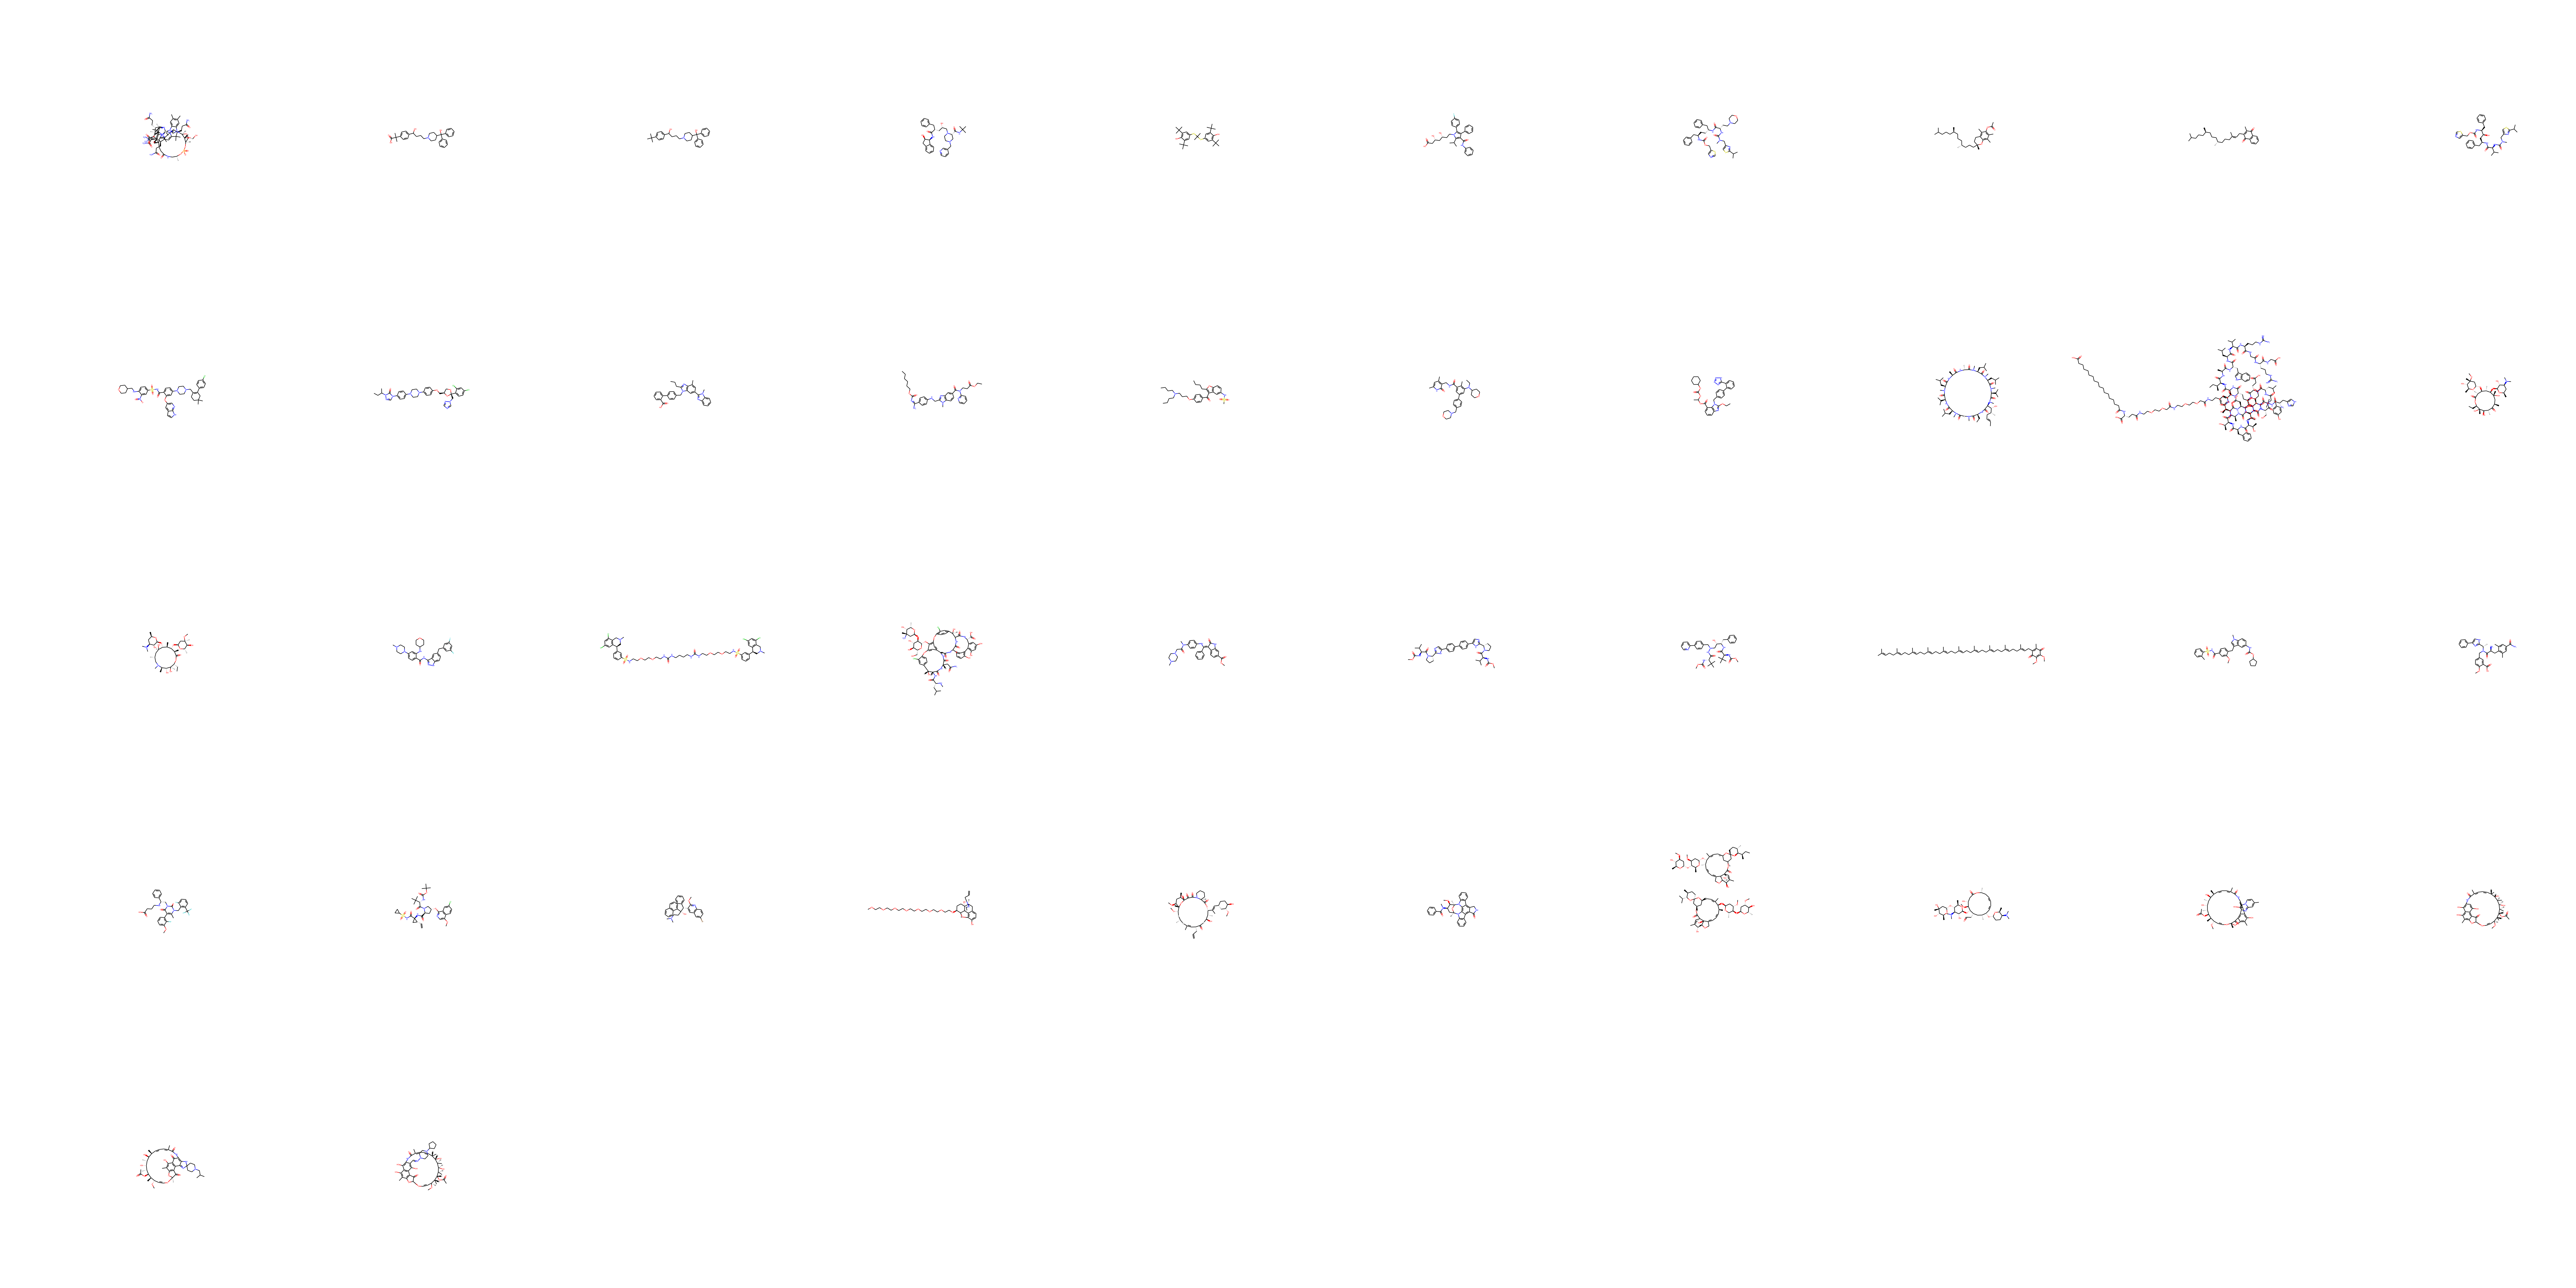

In [70]:
image

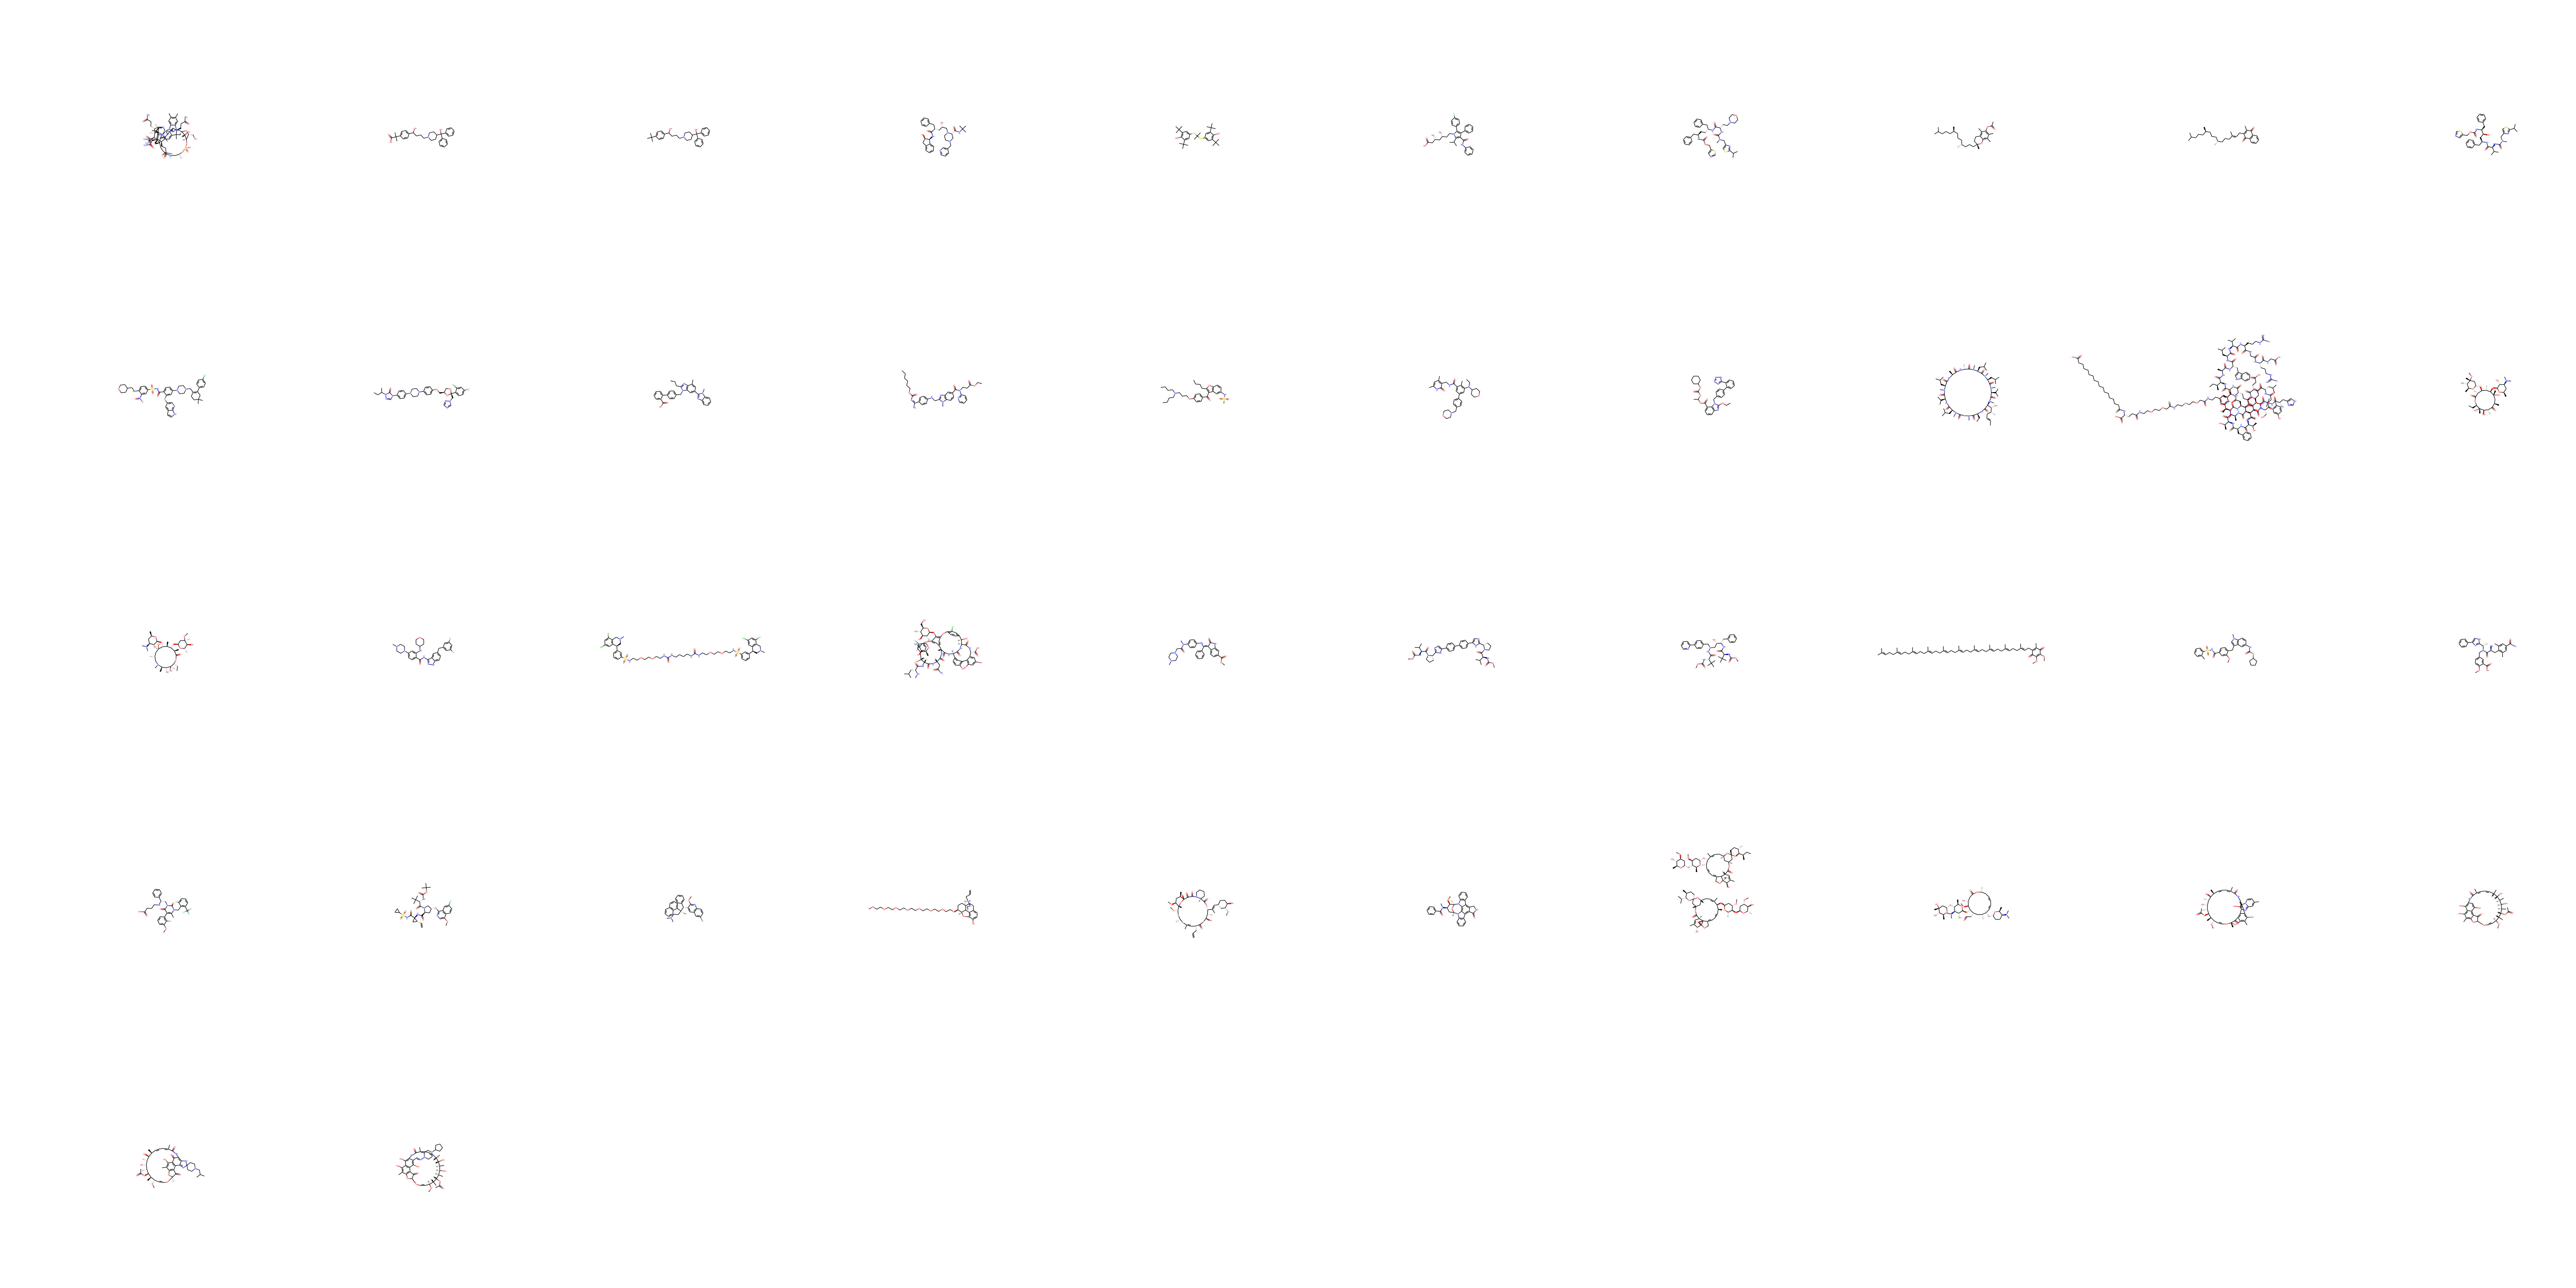

In [72]:
#조금더 깨끗하게 이미지 얻고 싶으면.. 2차원 좌표 얻는 함수 돌려보자..
from rdkit.Chem import AllChem

for m in large_molecules:
    AllChem.Compute2DCoords(m)              #분자들은 2차원 좌표 생성 함수로 한번 돌려준 후
image=Draw.MolsToGridImage(large_molecules,molsPerRow=10,subImgSize=(1000,1000))
image

## * rdkit.Chem.rdMolDescriptors.분자의 성질 계산 함수() *

https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html

In [73]:
#rdMolDescriptors 모듈을 사용해서 분자의 성질을 계산해보자!
import rdkit
from rdkit import Chem

from rdkit.Chem import rdMolDescriptors       # rdMolDescriptors 모듈 불러옴.

molecules = []       
with open('drugs.smi') as fp:      
    for line in fp:    
        mol = Chem.MolFromSmiles(line.strip())    
        molecules.append(mol)

### rdMolDescriptors.CalcNumHBA(m)

In [74]:
import rdkit
from rdkit import Chem

from rdkit.Chem import rdMolDescriptors       # rdMolDescriptors 모듈 불러옴.
molecules = []       
with open('drugs.smi') as fp:      
    for line in fp:    
        mol = Chem.MolFromSmiles(line.strip())    
        molecules.append(mol)

for m in molecules:
    print(rdMolDescriptors.CalcNumHBA(m))  #각 molecule에서 Hydrogen Bond Acceptor의 개수 리턴.

3
1
16
3
3
2
4
7
10
9
4
6
4
6
9
7
3
2
6
3
5
2
3
5
5
7
3
9
10
3
2
1
2
3
5
3
4
13
3
3
3
7
7
4
4
5
5
4
3
3
4
4
1
8
3
3
4
3
5
5
5
1
7
10
5
1
1
2
3
2
2
1
2
7
8
5
3
2
4
3
7
2
4
4
6
4
2
5
6
4
4
4
4
5
3
3
4
4
10
10
7
7
1
1
1
10
9
9
2
3
5
3
4
2
3
3
2
2
3
2
1
1
2
2
5
3
2
3
5
3
3
11
4
1
4
2
9
8
3
2
7
6
3
5
2
4
4
5
4
4
5
4
4
3
7
4
3
3
2
2
10
5
3
2
6
1
3
2
5
4
4
4
3
3
2
7
6
5
6
8
8
9
5
6
5
3
6
4
4
8
5
3
3
4
5
6
4
3
3
2
2
2
6
3
3
12
2
6
1
3
3
2
2
3
3
2
2
4
5
3
10
2
4
5
5
2
7
5
4
4
3
3
1
6
2
7
8
5
8
5
5
6
4
6
5
5
3
2
2
1
6
2
5
3
3
4
0
1
5
9
6
4
3
8
4
2
6
5
3
5
12
3
4
2
3
3
4
8
4
4
4
4
11
7
2
5
3
6
6
2
2
2
4
2
3
4
2
3
3
3
4
3
3
2
4
5
6
2
4
5
5
8
1
1
3
3
4
5
7
7
3
4
5
2
3
4
6
9
7
5
5
6
4
8
7
6
7
6
11
11
5
10
6
7
5
4
4
12
8
56
2
2
14
14
4
2
2
2
2
3
8
3
3
2
2
8
2
4
6
2
3
2
2
2
4
3
3
1
1
3
2
2
3
4
3
3
3
3
2
2
2
2
7
6
5
8
10
9
6
6
1
8
9
7
2
7
3
6
6
5
3
5
6
4
3
3
2
3
2
8
7
5
5
10
3
2
8
6
6
6
7
2
3
1
2
4
4
3
2
2
5
7
7
2
2
6
4
5
4
7
6
4
4
3
4
12
4
6
6
9
7
9
4
5
6
4
4
4
5
4
7
8
1
3
2
2
2
1
1
1
2
2
3
4
3
3
3
3


### rdMolDescriptors.CalcNumHBD(m)

In [75]:
import rdkit
from rdkit import Chem

from rdkit.Chem import rdMolDescriptors       # rdMolDescriptors 모듈 불러옴.
molecules = []       
with open('drugs.smi') as fp:      
    for line in fp:    
        mol = Chem.MolFromSmiles(line.strip())    
        molecules.append(mol)

for m in molecules:
    print(rdMolDescriptors.CalcNumHBD(m))   #각 molecule에서 Hydrogen Bond Donor의 개수 리턴.

1
1
9
1
0
2
0
2
1
2
2
1
1
1
8
0
3
2
2
2
1
2
3
0
0
1
1
1
1
1
1
1
1
1
0
0
3
1
1
3
2
2
4
4
4
4
4
4
2
3
4
6
1
3
1
2
2
1
2
4
2
1
3
3
1
0
1
1
0
1
0
1
2
3
4
1
1
2
4
1
1
1
1
3
1
1
5
3
3
4
3
3
2
2
2
3
2
0
2
3
2
3
1
1
1
4
3
4
2
0
5
3
4
0
0
0
0
1
2
2
1
1
1
1
2
5
2
2
1
1
3
3
1
1
1
2
5
2
1
1
1
0
4
2
2
1
3
0
1
1
2
1
1
2
2
2
1
0
0
2
2
2
1
1
2
1
0
0
2
1
2
2
1
2
0
2
3
2
2
1
3
3
1
3
1
0
3
0
0
1
2
1
1
2
2
1
2
0
1
0
1
1
1
0
2
0
2
0
1
1
2
2
1
2
2
1
1
2
3
1
3
2
1
1
1
1
0
3
2
2
2
2
1
2
2
3
1
1
1
2
2
1
0
2
1
2
1
0
2
1
0
2
2
3
0
0
0
0
1
2
2
5
4
3
3
1
1
4
2
3
1
0
1
1
1
2
2
2
2
0
2
2
4
4
1
0
0
2
2
1
0
1
0
0
0
1
1
1
0
3
2
2
0
0
2
3
1
1
1
2
2
1
1
1
0
0
1
1
2
2
1
0
2
0
0
3
1
2
2
2
2
2
2
2
1
4
4
2
1
1
1
0
0
1
0
4
2
5
2
57
1
1
5
5
0
2
0
2
4
1
2
0
1
0
0
3
0
1
0
1
2
0
0
1
1
1
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
2
0
0
2
5
2
1
2
0
2
3
1
0
1
0
2
2
2
1
2
2
0
1
1
0
0
0
2
1
1
1
1
1
1
1
3
3
0
0
0
0
0
0
1
0
1
0
0
1
0
0
0
0
3
1
1
0
2
1
0
0
0
3
6
1
1
2
2
1
7
1
1
1
1
2
3
1
3
2
2
1
1
3
1
1
1
1
1
1
1
1
4
3
3
2
2
1
2
2
3
19
1
3
1
1
1
1


---
### 예제8) drugs.smi 파일 안에 있는 분자들의 H-bond acceptor와 H-bond donor의 개수의 평균과 표준편차를 구하는 함수를 짜보자.
---

In [ ]:
#평균을 구하려면 다 더해서 총 개수로 나눠주면 되고, 
#표준편차는 (변인-평균)제곱의 합을 (총 개수-1)로 나눈 후 루트를 씌움.

In [101]:
import rdkit
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors       # rdMolDescriptors 모듈 불러옴.

# 먼저 분자들의 HBA 개수를 요소로 갖는 리스트와 HBD 개수를 요소로 갖는 리스트 생성.
molecules = []                         #분자들을 넣을 수 있는 빈 리스트 생성.
with open('drugs.smi') as fp:          #fp 파일 객체로 SMILES 목록 파일 열어줌.  
    for line in fp:                    #파일을 한 줄 씩 읽어 들임.
        mol = Chem.MolFromSmiles(line.strip()) #각줄의 \n을 제거한 SMILES들을 분자로 읽어들임.
        mol_H = Chem.AddHs(mol)         #분자에 수소 붙여줌. (새로운 분자로 생성되므로 이름 지정해줘야함.)
        molecules.append(mol_H)         #리스트에 분자들 넣어줌.
        
hba_nums = [] #수소결합 받개의 개수를 저장할 리스트 생성.
hbd_nums = [] #수소결합 주개의 개수를 저장할 리스트 생성.
for m in molecules:                     #앞에서 만든 분자들이 들어있는 리스트에서 분자 한개씩 읽어 들임.
    hba_nums.append(rdMolDescriptors.CalcNumHBA(m))  #분자의 수소결합 받개의 개수 리스트에 추가.
    hbd_nums.append(rdMolDescriptors.CalcNumHBD(m))  #분자의 수소결합 주개의 개수 리스트에 추가.

In [104]:
print(hba_nums)

[3, 1, 16, 3, 3, 2, 4, 7, 10, 9, 4, 6, 4, 6, 9, 7, 4, 2, 6, 4, 5, 2, 4, 5, 5, 7, 4, 9, 10, 3, 3, 2, 3, 4, 5, 3, 5, 13, 3, 3, 3, 7, 7, 4, 4, 5, 5, 4, 3, 5, 5, 4, 1, 8, 4, 4, 4, 3, 6, 6, 6, 1, 8, 10, 5, 1, 2, 2, 3, 2, 2, 1, 2, 7, 10, 6, 3, 3, 4, 3, 7, 2, 4, 5, 6, 4, 2, 5, 6, 4, 4, 4, 4, 5, 3, 3, 4, 4, 10, 10, 7, 7, 1, 1, 1, 10, 9, 9, 3, 3, 5, 3, 4, 2, 3, 3, 2, 2, 3, 2, 1, 1, 2, 2, 5, 7, 3, 3, 5, 3, 4, 11, 4, 1, 4, 3, 9, 8, 3, 3, 7, 6, 3, 5, 3, 4, 4, 5, 4, 4, 5, 5, 4, 3, 7, 4, 3, 3, 2, 2, 10, 5, 3, 3, 6, 2, 3, 2, 5, 4, 4, 4, 3, 3, 2, 7, 6, 5, 6, 8, 8, 9, 5, 6, 5, 3, 7, 4, 4, 8, 5, 3, 3, 4, 6, 7, 4, 3, 4, 2, 2, 2, 7, 3, 3, 12, 3, 6, 1, 3, 3, 2, 2, 3, 3, 2, 2, 4, 5, 3, 10, 3, 5, 5, 5, 2, 7, 5, 4, 4, 3, 3, 2, 8, 2, 8, 8, 6, 8, 6, 5, 7, 4, 6, 5, 7, 3, 2, 2, 1, 6, 2, 5, 3, 3, 4, 0, 1, 5, 9, 7, 8, 3, 8, 5, 2, 6, 5, 3, 6, 12, 3, 4, 2, 4, 3, 4, 8, 4, 4, 4, 4, 11, 7, 2, 5, 3, 6, 6, 2, 2, 2, 4, 2, 3, 4, 2, 3, 3, 3, 4, 3, 3, 2, 4, 5, 6, 2, 5, 6, 6, 8, 1, 1, 3, 3, 4, 5, 7, 7, 3, 4, 5, 2, 3, 4, 6, 9, 

In [105]:
print(hbd_nums)

[1, 1, 9, 1, 0, 2, 0, 2, 1, 2, 2, 1, 1, 1, 8, 0, 3, 2, 2, 2, 1, 2, 3, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 3, 1, 1, 3, 2, 2, 4, 4, 4, 4, 4, 4, 2, 3, 4, 6, 1, 3, 1, 2, 2, 1, 2, 4, 2, 1, 3, 3, 1, 0, 1, 1, 0, 1, 0, 1, 2, 3, 4, 1, 1, 2, 4, 1, 1, 1, 1, 3, 1, 1, 5, 3, 3, 4, 3, 3, 2, 2, 2, 3, 2, 0, 2, 3, 2, 3, 1, 1, 1, 4, 3, 4, 2, 0, 5, 3, 4, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 1, 2, 5, 2, 2, 1, 1, 3, 3, 1, 1, 1, 2, 5, 2, 1, 1, 1, 0, 4, 2, 2, 1, 3, 0, 1, 1, 2, 1, 1, 2, 2, 2, 1, 0, 0, 2, 2, 2, 1, 1, 2, 1, 0, 0, 2, 1, 2, 2, 1, 2, 0, 2, 3, 2, 2, 1, 3, 3, 1, 3, 1, 0, 3, 0, 0, 1, 2, 1, 1, 2, 2, 1, 2, 0, 1, 0, 1, 1, 1, 0, 2, 0, 2, 0, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 3, 1, 3, 2, 1, 1, 1, 1, 0, 3, 2, 2, 2, 2, 1, 2, 2, 3, 1, 1, 1, 2, 2, 1, 0, 2, 1, 2, 1, 0, 2, 1, 0, 2, 2, 3, 0, 0, 0, 0, 1, 2, 2, 5, 4, 3, 3, 1, 1, 4, 2, 3, 1, 0, 1, 1, 1, 2, 2, 2, 2, 0, 2, 2, 4, 4, 1, 0, 0, 2, 2, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 3, 2, 2, 0, 0, 2, 3, 1, 1, 1, 2, 2, 1, 1, 1, 0, 0, 1, 1, 2, 2, 1, 0, 2, 0, 0, 3, 1, 2, 2, 2, 2, 2, 2, 

In [90]:
#위에 만든 리스트들을 매개변수(num_list)에다가 input으로 넣을 수 있는 함수짜기!

#평균을 구하는 함수 짜기! input은 num_list , output은 average.
def average(num_list):
    avg = sum(num_list) / len(num_list)
    return avg

#평균과 표준편차를 둘다 구하는 함수 짜기! input은 num_list , output은 average와 standard deviation.
import math     # math라는 모듈 안에 .sqrt() 루트함수 있음.
def average_and_std(num_list):
    avg = sum(num_list) / len(num_list)
    std = 0
    for n in num_list:
        std = std + (n-avg)**2     # sigma (x-x')**2
    std = std / (len(num_list)-1)  # sigma (x-x')**2 / n-1
    std = math.sqrt(std)   #루트 씌움. (변수이름이 std로 같으면 위에까지의 변수를 오른쪽 변수가 받고 오른쪽 식이 적용된 값이 왼쪽 변수로 들어감.)
    return avg, std

In [106]:
average_and_std(hba_nums)

(5.033333333333333, 3.822290595688053)

In [107]:
average_and_std(hbd_nums)

(1.685, 2.7193319541991428)

In [95]:
#예쁘게 저장하기 위해 리스트 요소들을 변수에 저장.
avg_hba, std_hba = average_and_std(hba_nums)
avg_hbd, std_hbd = average_and_std(hbd_nums)

* 소수점 넷째자리 까지 구하는 방법 { .4f}

In [98]:
print(f"H-bond acceptor의 평균과 표준편차 : {avg_hba:.4f} 그리고 {std_hba:.4f}")
print(f"H-bond donor의 평균과 표준편차    : {avg_hbd:.4f} 그리고 {std_hbd:.4f}")

H-bond acceptor의 평균과 표준편차 : 4.8633 그리고 3.6221
H-bond donor의 평균과 표준편차    : 1.6850 그리고 2.7193


---
### 예제8/해설o) drugs.smi 파일 안에 있는 분자들의 H-bond acceptor와 H-bond donor의 개수의 평균과 표준편차를 구하는 함수를 짜보자.
---

In [108]:
import rdkit
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors       # rdMolDescriptors 모듈 불러옴.

# 먼저 분자들의 HBA 개수를 요소로 갖는 리스트와 HBD 개수를 요소로 갖는 리스트 생성.
molecules = []                         #분자들을 넣을 수 있는 빈 리스트 생성.
with open('drugs.smi') as fp:          #fp 파일 객체로 SMILES 목록 파일 열어줌.  
    for line in fp:                    #파일을 한 줄 씩 읽어 들임.
        mol = Chem.MolFromSmiles(line.strip()) #각줄의 \n을 제거한 SMILES들을 분자로 읽어들임.
        mol_H = Chem.AddHs(mol)         #분자에 수소 붙여줌. (새로운 분자로 생성되므로 이름 지정해줘야함.)
#한줄로 줄여도 됨: mol = Chem.AddHs(mol)(Chem.MolFromSmiles(line.strip()))
        molecules.append(mol_H)         #리스트에 분자들 넣어줌.
        
hba_nums = [] #수소결합 받개의 개수를 저장할 리스트 생성.
hbd_nums = [] #수소결합 주개의 개수를 저장할 리스트 생성.
for m in molecules:                     #앞에서 만든 분자들이 들어있는 리스트에서 분자 한개씩 읽어 들임.
    hba_nums.append(rdMolDescriptors.CalcNumHBA(m))  #분자의 수소결합 받개의 개수 리스트에 추가.
    hbd_nums.append(rdMolDescriptors.CalcNumHBD(m))  #분자의 수소결합 주개의 개수 리스트에 추가.
    
#위에 만든 리스트들을 매개변수(num_list)에다가 input으로 넣을 수 있는 함수짜기!
#평균과 표준편차를 둘다 구하는 함수 짜기! input은 num_list , output은 average와 standard deviation.
import math     # math라는 모듈 안에 .sqrt() 루트함수 있음.
def average_and_std(num_list):
    avg = sum(num_list) / len(num_list)
    std = 0
    for n in num_list:
        std = std + (n-avg)**2     # sigma (x-x')**2
    std = std / (len(num_list)-1)  # sigma (x-x')**2 / n-1
    std = math.sqrt(std)   #루트 씌움. (변수이름이 std로 같으면 위에까지의 변수를 오른쪽 변수가 받고 오른쪽 식이 적용된 값이 왼쪽 변수로 들어감.)
    return avg, std

#예쁘게 저장하기 위해 리스트 요소들을 변수에 저장.
avg_hba, std_hba = average_and_std(hba_nums)
avg_hbd, std_hbd = average_and_std(hbd_nums)

print(f"H-bond acceptor의 평균과 표준편차 : {avg_hba:.4f} 그리고 {std_hba:.4f}")  #{ .4f} 소숫점 4째자리까지 구하는 법.
print(f"H-bond donor의 평균과 표준편차    : {avg_hbd:.4f} 그리고 {std_hbd:.4f}")

H-bond acceptor의 평균과 표준편차 : 5.0333 그리고 3.8223
H-bond donor의 평균과 표준편차    : 1.6850 그리고 2.7193


---
### 예제8/해설X) drugs.smi 파일 안에 있는 분자들의 H-bond acceptor와 H-bond donor의 개수의 평균과 표준편차를 구하는 함수를 짜보자.
---

In [103]:
from rdkit.Chem import rdMolDescriptors  

molecules = []       
with open('drugs.smi') as fp:      
    for line in fp:    
        mol = Chem.MolFromSmiles(line.strip()) 
        mol_H = Chem.AddHs(mol)         #분자에 수소 붙여줌. (새로운 분자로 생성되므로 이름 지정해줘야함.)
        molecules.append(mol_H)
        
hba_nums = []
hbd_nums = [] 
for m in molecules:
    hba_nums.append(rdMolDescriptors.CalcNumHBA(m)) 
    hbd_nums.append(rdMolDescriptors.CalcNumHBD(m)) 
    
import math     # math라는 모듈 안에 .sqrt() 루트함수 있음.
def average_and_std(num_list):
    avg = sum(num_list) / len(num_list)
    std = 0
    for n in num_list:
        std = std + (n-avg)**2    
    std = std / (len(num_list)-1) 
    std = math.sqrt(std)  
    return avg, std

#예쁘게 저장하기 위해 리스트 요소들을 변수에 저장.
avg_hba, std_hba = average_and_std(hba_nums)
avg_hbd, std_hbd = average_and_std(hbd_nums)

print(f"H-bond acceptor의 평균과 표준편차 : {avg_hba:.4f} 그리고 {std_hba:.4f}")
print(f"H-bond donor의 평균과 표준편차    : {avg_hbd:.4f} 그리고 {std_hbd:.4f}")

H-bond acceptor의 평균과 표준편차 : 5.0333 그리고 3.8223
H-bond donor의 평균과 표준편차    : 1.6850 그리고 2.7193


# <span style="color:blue">10주차(1) RDKit - generating 3D conformations of molecules</span>
---
## 3D 분자 작업
---
### 3D 좌표 생성 함수(3차원 구조 생성 함수) AllChem.EmbedMolecule(m~)
### MMFF force-field 최적화 함수 AllChem.MMFFOptimizeMolecule(m~)
* 리턴값은 0이지만 (계산 됐다는 뜻) 분자 자체의 3D 좌표가 변환된다.
* 결과는 상당히 rough한 결과이다. 따라서 한번 더 MMFF force-field를 이용해서 최적화를 해준다.

In [22]:
import rdkit
from rdkit import Chem

molecules = []
for smi in open('drugs.smi').readlines():     #drugs.smi 파일에서 한줄 씩 읽게됨.
    m = Chem.MolFromSmiles(smi)
    molecules.append(m) 

m_target = molecules[100]
m_target_H = Chem.AddHs(m_target)       #수소 붙이고,

from rdkit.Chem import AllChem
AllChem.EmbedMolecule(m_target_H)       #3D 좌표 생성.

0

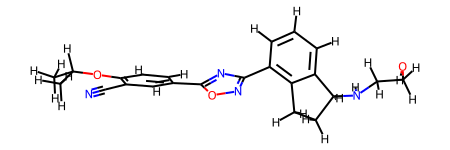

In [23]:
m_target_H

In [24]:
AllChem.MMFFOptimizeMolecule(m_target_H)      #m_target_H는 최적화된 3D 구조를 가지고 있는 100(101)번째 분자의 변수. 

1

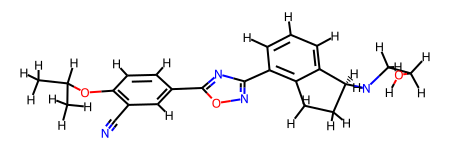

In [25]:
m_target_H

In [26]:
print(Chem.MolToMolBlock(m_target_H))    #mol file format으로.


     RDKit          3D

 54 57  0  0  0  0  0  0  0  0999 V2000
   -7.8840   -1.1010    1.0074 C   0  0  0  0  0  0  0  0  0  0  0  0
   -7.8680   -0.0696   -0.1200 C   0  0  0  0  0  0  0  0  0  0  0  0
   -9.2733    0.0851   -0.6973 C   0  0  0  0  0  0  0  0  0  0  0  0
   -7.0316   -0.5145   -1.1955 O   0  0  0  0  0  0  0  0  0  0  0  0
   -5.6716   -0.4196   -1.0915 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.9275   -1.1058   -2.0658 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.5231   -1.0706   -2.0448 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.8372   -0.3465   -1.0609 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.5894    0.3437   -0.1019 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.9900    0.3093   -0.1153 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.3816   -0.2883   -1.0105 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.5966    0.3775   -0.1947 N   0  0  0  0  0  0  0  0  0  0  0  0
    0.6678    0.0285   -0.6294 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.6601   -0.8093   -1

### 파일로 저장하는 법 print(Chem.MolToBlock(m~),file=open('파일명.확장자','w+'))
* 'w' 쓰기 모드
* 'w+' +는 append. 없으면 새로 만들어서 찍고 없으면 뒤에다가 append 시킴.

In [33]:
print(Chem.MolToMolBlock(m_target_H),file = open("100th.mol","w+"))

### 최적화 #번 돌려서 구조이성질체 #개를 만드는 함수 
### AllChem.EmbedMultipleConfs(m~, numConfs=#)

In [35]:
m = Chem.MolFromSmiles('C1CCC1OC')
m2=Chem.AddHs(m)

In [36]:
cids = AllChem.EmbedMultipleConfs(m2, numConfs=10)   # m2안에 10개의 conformation이 들어있게 됨.
rmslist = []

### 구조이성질체가 들어간 m~ 안의 첫번째 구조가 참고가 되는 함수 AllChem.AlignMolConformers(m~,옵션)
* (리턴:Mol)
* 첫번째구조에 대한 나머지구조의 RMSD(평균 제곱근 편차)값(단위:옴스트롱)들을 리스트로 얻는 옵션 주기 AllChem.AlignMolConformers(m~,RMSlist=리스트명)

In [44]:
rmslist = []      #옵션을 받을 빈 리스트 생성.
AllChem.AlignMolConformers(m2, RMSlist=rmslist) # m2에 있는 첫번째 구조와 나머지 구조의 길이의 차이를 계산.
print(rmslist)

[1.5103556639390332, 1.2344931921316915, 1.4402749754226354, 0.9445845444761956, 1.3722501391083501, 1.2117115715605822, 1.2287592863423829, 1.2828617848885004, 1.5917917779822846]


# <span style="color:blue">10주차(2) RDKit - Chemical Fingerprint</span>
---
## 모건 지문(원형 지문)
---
### Fingerprint 계산 함수 AllChem.GetMorganFingerprint(m~,ECFP interation 횟수) 
* (리턴:UIntSparseIntVect) 
* 계산된 fingerprint 보기 위해서는 f~.GetNonzeroElements() 메서드 사용. (리턴:dic) /메서드는 dir()로 확인 가능

In [33]:
#분자들을 먼저 리스트에 담고 그중 원하는 분자를 꺼내서 fingerprint를 구하는 방법으로.
import rdkit
from rdkit import Chem

molecules_H = []
for smi in open('drugs.smi').readlines():     #drugs.smi 파일에서 한줄 씩 읽게됨.
    m = Chem.MolFromSmiles(smi)
    m_H = Chem.AddHs(m)                     #모든 분자들에 H를 붙인 새로 생성된 분자들을
    molecules_H.append(m_H)                     #빈 리스트에 저장.
    
from rdkit.Chem import AllChem

fp1 = AllChem.GetMorganFingerprint(molecules_H[0],2)  #ECFP interation 반복을 많이 하면 정보양 상승, 정확도 상승/ 검색 속도 하락.
fp2  =AllChem.GetMorganFingerprint(molecules_H[1],2)

fp1.GetNonzeroElements()   # 0이 아닌 정수리스트를 확인.  #{분자를 쪼갠 조각들에 부여한 정수 : 그 조각의 개수}

{10565946: 1,
 36538691: 1,
 56091288: 7,
 231329144: 1,
 295224923: 1,
 490247508: 6,
 618185734: 1,
 631553871: 1,
 658782932: 1,
 772606658: 1,
 829315160: 2,
 864942730: 1,
 886246489: 1,
 1101907775: 1,
 1319199979: 1,
 1461310226: 1,
 1665999679: 1,
 1957005222: 1,
 2013031783: 1,
 2041434490: 2,
 2092489639: 1,
 2277419761: 1,
 2912088145: 1,
 2976816164: 1,
 3067762898: 1,
 3210252437: 1,
 3217380708: 13,
 3265829077: 1,
 3352400832: 1,
 3430949351: 1,
 3602415581: 1,
 3612926680: 1,
 3624363645: 1,
 3632350815: 1,
 3650455129: 1,
 3798139026: 1,
 3838343967: 1,
 3974650111: 1,
 3980805843: 1,
 4240369074: 1,
 4277593716: 10}

In [35]:
type(fp1)

rdkit.DataStructs.cDataStructs.UIntSparseIntVect

In [11]:
type(fp1.GetNonzeroElements() )

dict

In [29]:
#분자들의 fingerprint를 리스트에 담은 후 그 중 원하는 분자를 꺼내오는 방법으로.
#여기서는 = Chem.RDKFingerprint(m~) 함수를 씀. (리턴:ExplicitBitVect)
import rdkit
from rdkit import Chem


fps = []
for smi in open('drugs.smi').readlines():     #drugs.smi 파일에서 한줄 씩 읽게됨.
    m = Chem.MolFromSmiles(smi)
    m_H = Chem.AddHs(m)                     #모든 분자들에 H를 붙인 새로 생성된 분자들을
    fp = Chem.RDKFingerprint(m_H)
    fps.append(fp)

In [31]:
fps[0]

### Fingerprint 를 BitVector로 바꿔주는 함수 AllChem.GetMorganFingerprintAsBitVect(m~,ECFP interation 횟수,nBits=1024)
* (리턴:ExplicitBitVect) 
* 계산된 Bit를 보기 위해서는 f~.ToBitString() 메서드 사용. (리턴:str) /메서드는 dir()로 확인 가능)

In [6]:
fp1_bit = AllChem.GetMorganFingerprintAsBitVect(molecules_H[0],2,nBits=1024) #1024개의 0/1로 표현해라.
fp2_bit = AllChem.GetMorganFingerprintAsBitVect(molecules_H[1],2,nBits=1024)

In [9]:
fp1_bit.ToBitString()  #0과 1로 이루어진 문자열로 리턴. #각 정수들이 1024개중의 어딘가에 1로 표현되게 됨.

'000000100000000000000000000000000000100000000000000000000000000000000000000000000100000011000000000000000000000000000000000000000000000000000000001001000000000000000000000000000000000000000000000000000000000000100100000000000000000000010000000000000000000100000000000000000000000000000000000000000000000000000000001000000001000000000000000010000000000000001001000000000000000010100000000000000000000000000000000000000000000000000000001000000000000000000000000000000000000000000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000010100010000000000000000000010000000010000000000001000000000000010000000000000000000000000000000000000000010000000000000000110001000000000000000000000000100000000000000000000000000000000100000000000010000000000000000000000000000000100000000000000010000000000000000000000000000000000000000000000000000000000000000000000000000000000000011000000000000000000000000100000000000000000000000000001000000000

### Fingerprint로 두 분자의 Dice Similarty를 계산하는 함수 DataStructs.DiceSimilarity(f~ , f~')
* (인풋:UIntSparseIntVect(정수형으로 된 fingerprint))
* (리턴:float실수형)

In [34]:
from rdkit import DataStructs
DataStructs.DiceSimilarity(fp1,fp2)   #fp1과 fp2 사이의 Dice similarity를 비교한다.

0.4

### Fingerprint로 두 분자의 Tanimoto Foefficient를 계산하는 함수 DataStructs.FingerprintSimilarity(f~ , f~')
* (인풋:ExplicitBitVect(0/1비트형으로된 fingerprit))
* (리턴:float실수형)

In [38]:
DataStructs.FingerprintSimilarity(fp1_bit,fp2_bit)
#임의의 두개의 (0/1로 이루어진) bit vector에서 합집합: 1024개의 각 위치마다 둘 중에 하나라도 1이면 1로 표현.
#임의의 두개의 (0/1로 이루어진) bit vector에서 교집합(intersection): 1024개의 각 위치마다 둘 다 1인 경우에 1로 표현.

0.16393442622950818